### DoRothEA VS CollecTRI

&emsp;&emsp;&emsp;



<br></br>

### **Data Preparation**

In [ ]:
# Install necessary libraries
%pip install scanpy
%pip install decoupler
%pip install pydeseq2
%pip install adjustText
%pip install omnipath

<!-- # Install necessary libraries
%pip install scanpy
%pip install decoupler
%pip install pydeseq2
%pip install adjustText
%pip install omnipath -->

In [1]:
# Import Necessary libraries
import scanpy as sc
import decoupler as dc
import omnipath as op

# Data Manipulation
import numpy as np
import pandas as pd
from anndata import AnnData
from scipy import stats

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Differential Expression Analysis (DESeq2)
from pydeseq2.dds import DeseqDataSet


import warnings
warnings.filterwarnings("ignore")

import os
# os.mkdir("/content/datasets")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/heng/miniconda3/envs/decoupler_heng/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Retrieve CollecTRI gene regulatory network
try:
    collectri = dc.get_collectri(organism='human', split_complexes=False)
    collectri.to_csv("datasets/collectri.csv",index=False)
except:
    collectri = pd.read_table("datasets/collectri.csv", sep=',')
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [4]:
# Retrieve DoRothEA gene regulatory network
try:
    dorothea = dc.get_dorothea(organism='human')
    dorothea['weight'] = np.sign(dorothea['weight'])
    dorothea.to_csv("datasets/dorothea.csv",index=False)
except:
    dorothea = pd.read_table("datasets/dorothea.csv", sep=',')
dorothea

185MB [01:32, 2.09MB/s] 


,source,confidence,target,weight
0,MYC,A,TERT,1.000000
1,FOS,A,NTS,1.000000
2,FOS,A,NTF3,1.000000
3,FOS,A,NFKB1,-1.000000
4,FOS,A,NEFL,1.000000
...,...,...,...,...
32270,LEF1,C,NKD1,0.333333
32271,LEF1,C,NETO2,0.333333
32272,LEF1,C,MYO18B,0.333333
32273,LEF1,C,PHLDB2,0.333333


In [5]:
# Download the data from GEO
try:
    !wget 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE151251&format=file&file=GSE151251%5FHSCs%5FCtrl%2Evs%2EHSCs%5FTGFb%2Ecounts%2Etsv%2Egz' -O counts.txt.gz
    !gzip -d -f counts.txt.gz
    !mv counts.txt datasets/counts.txt
except:
    print("Error! Please upload counts.txt file manually.")

# Read raw data and process it
adata_table = pd.read_csv('datasets/counts.txt', index_col=2, sep='\t').iloc[:, 5:].T
adata_table

zsh:1: command not found: wget


gzip: can't stat: counts.txt.gz (counts.txt.gz.gz): No such file or directory
mv: counts.txt: No such file or directory


GeneName,DDX11L1,WASH7P,MIR6859-1,MIR1302-11,MIR1302-9,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
25_HSCs-Ctrl1,0,9,10,1,0,0,0,0,0,33,...,93192,342,476,493,54466,17184,1302,54099,258,475
26_HSCs-Ctrl2,0,12,14,0,0,0,0,0,0,66,...,114914,355,388,436,64698,21106,1492,62679,253,396
27_HSCs-Ctrl3,0,14,10,0,0,0,0,0,0,52,...,155365,377,438,480,85650,31860,2033,89559,282,448
31_HSCs-TGFb1,0,11,16,0,0,0,0,0,0,54,...,110866,373,441,481,60325,19496,1447,66283,172,341
32_HSCs-TGFb2,0,5,8,0,0,0,0,0,0,44,...,45488,239,331,343,27442,9054,624,27535,96,216
33_HSCs-TGFb3,0,12,5,0,0,0,0,0,0,32,...,70704,344,453,497,45443,13796,1077,43415,192,243


In [6]:
df_gse186341 = pd.read_csv("datasets/GSE186341__deresults_deseqfiltered.csv")
df_gse186341

,DU145_AZD5363_v_DU145_DMSO,PANC1_AFATINIB_v_PANC1_DMSO,HCC1143_TIVANTINIB_v_HCC1143_DMSO,PANC1_CRIZOTINIB_v_PANC1_DMSO,PANC1_MK2206_v_PANC1_DMSO,EFO21_CABOZANTINIB_v_EFO21_DMSO,LNCAP_CRENOLANIB_v_LNCAP_DMSO,DU145_IMATINIB_v_DU145_DMSO,KRJ1_TIVANTINIB_v_KRJ1_DMSO,KRJ1_SUNITINIB_v_KRJ1_DMSO,...,LNCAP_GEFITINIB_v_LNCAP_DMSO,HSTS_DACOMITINIB_v_HSTS_DMSO,H1793_VARLITINIB_v_H1793_DMSO,DU145_VARLITINIB_v_DU145_DMSO,HCC1143_NERATINIB_v_HCC1143_DMSO,U87_ICOTINIB_v_U87_DMSO,HCC1143_AZD5363_v_HCC1143_DMSO,HF2597_MK2206_v_HF2597_DMSO,PANC1_BOSUTINIB_v_PANC1_DMSO,LNCAP_NILOTINIB_v_LNCAP_DMSO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.023806,NaN,NaN
1,1.388290,0.397981,-0.489952,2.251490,-0.552421,-1.656393,-0.013233,0.185035,0.449878,-0.140743,...,0.963558,NaN,NaN,-0.567860,1.303437,NaN,-1.519386,0.280534,-0.099218,1.781451
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24956,0.235048,NaN,NaN,NaN,NaN,-0.402193,NaN,-1.652535,NaN,NaN,...,NaN,NaN,-0.772985,0.074744,NaN,NaN,NaN,NaN,NaN,NaN
24957,-0.752776,0.554136,0.153537,0.516557,-0.163740,0.634953,-1.849620,0.535217,-1.002173,-0.839021,...,-0.157618,-2.605191,1.488438,0.554546,-0.246058,2.415272,1.302778,0.668076,0.085410,-0.124767
24958,-2.496335,0.836142,-0.521075,-0.882671,0.519291,1.151945,0.699869,1.917876,0.288017,-0.387367,...,1.148173,0.556863,0.371173,-1.748576,-0.833902,-0.707890,0.750566,0.374469,0.766960,0.100417
24959,-1.034335,0.869692,0.272643,0.381799,0.782504,-0.161608,-0.418962,0.716699,-0.817334,2.107148,...,-0.420189,-1.061567,0.611887,2.269384,-0.660199,-0.701863,0.924691,-0.427420,-0.513396,-0.647644


In [8]:
df_gse186341.columns.to_list()

['DU145_AZD5363_v_DU145_DMSO',
 'PANC1_AFATINIB_v_PANC1_DMSO',
 'HCC1143_TIVANTINIB_v_HCC1143_DMSO',
 'PANC1_CRIZOTINIB_v_PANC1_DMSO',
 'PANC1_MK2206_v_PANC1_DMSO',
 'EFO21_CABOZANTINIB_v_EFO21_DMSO',
 'LNCAP_CRENOLANIB_v_LNCAP_DMSO',
 'DU145_IMATINIB_v_DU145_DMSO',
 'KRJ1_TIVANTINIB_v_KRJ1_DMSO',
 'KRJ1_SUNITINIB_v_KRJ1_DMSO',
 'ASPC_CRENOLANIB_v_ASPC_DMSO',
 'KRJ1_MGCD265_v_KRJ1_DMSO',
 'DU145_GEFITINIB_v_DU145_DMSO',
 'HF2597_PONATINIB_v_HF2597_DMSO',
 'HSTS_LINIFANIB_v_HSTS_DMSO',
 'KRJ1_LINIFANIB_v_KRJ1_DMSO',
 'ASPC_OSIMERTINIB_v_ASPC_DMSO',
 'DU145_SORAFENIB_v_DU145_DMSO',
 'PANC1_OSIMERTINIB_v_PANC1_DMSO',
 'HF2597_AZD5363_v_HF2597_DMSO',
 'PANC1_ICOTINIB_v_PANC1_DMSO',
 'EFO21_VARLITINIB_v_EFO21_DMSO',
 'KRJ1_QUIZARTINIB_v_KRJ1_DMSO',
 'H1793_TIVANTINIB_v_H1793_DMSO',
 'EFO21_AFATINIB_v_EFO21_DMSO',
 'U87_CRENOLANIB_v_U87_DMSO',
 'ASPC_REGORAFENIB_v_ASPC_DMSO',
 'LNCAP_KW2449_v_LNCAP_DMSO',
 'U87_CABOZANTINIB_v_U87_DMSO',
 'H1793_CEDIRANIB_v_H1793_DMSO',
 'HCC1143_DOVITINIB_v_

In [ ]:
# Transform to AnnData object
adata = AnnData(adata_table, dtype=np.float32)
adata.var_names_make_unique()

# Process treatment information
adata.obs['condition'] = ['control' if '-Ctrl' in sample_id else 'treatment' for sample_id in adata.obs.index]

# Process sample information
adata.obs['sample_id'] = [sample_id.split('_')[0] for sample_id in adata.obs.index]

# Store raw counts in layers
adata.X = np.round(adata.X)
adata.layers['counts'] = adata.X

# Visualize metadata
adata.obs

,condition,sample_id
25_HSCs-Ctrl1,control,25
26_HSCs-Ctrl2,control,26
27_HSCs-Ctrl3,control,27
31_HSCs-TGFb1,treatment,31
32_HSCs-TGFb2,treatment,32
33_HSCs-TGFb3,treatment,33


AnnData object with n_obs × n_vars = 6 × 17575
    obs: 'condition', 'sample_id'
    layers: 'counts', 'cpm'

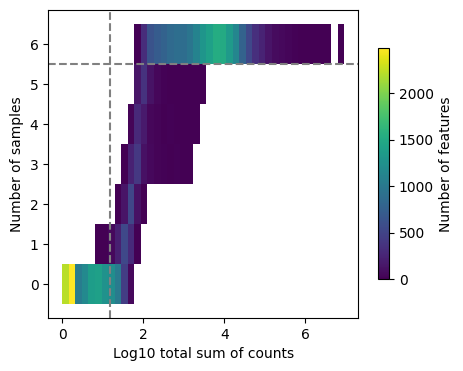

In [ ]:
# Quality Control (optional but recommended)
# --- only the genes in the upper-right corner are going to be kept
dc.plot_filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)

# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)

# Filter by these genes
adata_filtered = adata[:, genes].copy()

# Normalize total-count per million, CPM (library-size correct)
sc.pp.normalize_total(adata_filtered, target_sum=1e6)

# Store normalized counts in layers
adata_filtered.layers['cpm'] = adata_filtered.X

adata_filtered.X = adata_filtered.layers['counts']

# Visualize adata
adata_filtered

In [ ]:
# Convert anndata to dataframe
mat = adata_filtered.to_df(layer='cpm')
mat

GeneName,RP11-34P13.7,RP11-34P13.8,CICP27,FO538757.2,AP006222.2,RP4-669L17.10,MTND1P23,MTND2P28,AC114498.1,MIR6723,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
25_HSCs-Ctrl1,0.861613,0.600518,2.637059,1.305475,1.853774,0.496080,20.391516,51.644581,12.323682,628.011658,...,2433.196045,8.929447,12.428120,12.871981,1422.079712,448.665558,33.994560,1412.497559,6.736249,12.402010
26_HSCs-Ctrl2,1.341323,0.914539,2.581031,0.751954,0.975508,0.934862,18.026571,48.328281,9.734755,522.831543,...,2335.406250,7.214693,7.885355,8.860863,1314.862549,428.938904,30.322033,1273.830200,5.141739,8.047939
27_HSCs-Ctrl3,0.969110,0.633649,2.012767,0.838653,1.062294,0.465918,20.779961,56.823406,10.138384,572.576416,...,2895.496338,7.026049,8.162890,8.945633,1596.236328,593.766357,37.888481,1669.087402,5.255559,8.349257
31_HSCs-TGFb1,0.965408,0.536338,2.592299,0.500582,1.841426,0.536338,15.375017,44.802082,7.937799,367.212616,...,1982.054199,6.668467,7.884166,8.599282,1078.485962,348.548065,25.869360,1185.002563,3.075003,6.096373
32_HSCs-TGFb2,1.027534,0.653885,1.821537,0.607179,1.447888,0.607179,9.457981,26.295525,7.146030,227.505325,...,1062.283081,5.581377,7.729856,8.010093,640.854126,211.438431,14.572297,643.026001,2.241892,5.044257
33_HSCs-TGFb3,0.796692,0.522829,2.190902,0.423242,1.468900,0.248966,15.037556,47.253777,7.070639,369.415955,...,1760.290283,8.564435,11.278167,12.373617,1131.376831,343.473694,26.813654,1080.886475,4.780150,6.049877


In [ ]:
mat.apply([np.sum, np.min, np.max], axis=1)

,sum,amin,amax
25_HSCs-Ctrl1,1.000000e+06,0.234985,16724.437500
26_HSCs-Ctrl2,1.000000e+06,0.223554,20666.802734
27_HSCs-Ctrl3,1.000000e+06,0.223641,21531.746094
31_HSCs-TGFb1,1.000000e+06,0.232413,53465.296875
32_HSCs-TGFb2,1.000000e+06,0.233530,55140.593750
33_HSCs-TGFb3,1.000000e+06,0.224070,59497.929688


### **TASK 1** Without DEA

#### Calculate the TF activity

In [ ]:
# Infer TF activities with ulm using CollecTRI network
tf_collectri_acts, tf_collectri_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_collectri_acts
# tf_collectri_acts.apply([np.sum, np.min, np.max], axis=1)
# tf_collectri_acts.shape

Running ulm on mat with 6 samples and 17575 targets for 629 sources.


,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,ARID4A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
25_HSCs-Ctrl1,1.065369,3.513768,-0.092619,9.416823,3.750810,7.374182,2.209627,0.792456,-0.073562,-0.119644,...,2.369821,1.127670,-0.358643,17.152018,-0.152018,0.223835,0.792804,-0.641132,-0.200024,1.450069
26_HSCs-Ctrl2,1.030500,3.439764,-0.108949,9.543247,3.511437,7.277483,2.080467,0.805713,-0.070083,-0.108495,...,2.047254,1.055401,-0.310071,19.226736,-0.127963,0.200891,0.684690,-0.659765,-0.191540,1.307216
27_HSCs-Ctrl3,1.062467,3.423932,-0.105873,9.529863,3.719286,7.011393,2.019213,0.803646,-0.044515,-0.098158,...,2.195279,1.095722,-0.281857,19.752375,-0.130376,0.231477,0.739110,-0.655897,-0.193930,1.433861
31_HSCs-TGFb1,0.341344,2.637449,-0.137243,9.362064,1.862120,8.492096,0.501636,0.297469,-0.033156,-0.101031,...,0.258564,0.462094,-0.082978,16.974936,-0.076635,0.083366,0.223191,-0.273286,-0.090176,0.539266
32_HSCs-TGFb2,0.341261,2.539009,-0.125790,9.223310,1.679006,8.553974,0.518021,0.306204,-0.041595,-0.098013,...,0.221584,0.438338,-0.116582,16.314453,-0.093113,0.047600,0.247142,-0.285474,-0.080971,0.547607
33_HSCs-TGFb3,0.310873,2.437673,-0.130148,9.481165,1.448070,8.715354,0.467010,0.262756,-0.043612,-0.103782,...,0.259061,0.411983,-0.123147,14.641565,-0.087410,0.042556,0.246827,-0.249543,-0.083871,0.495250


In [ ]:
# Infer TF activities with ulm using DoRothEA network
tf_dorothea_acts, tf_dorothea_pvals = dc.run_ulm(mat=mat, net=dorothea, verbose=True)
tf_dorothea_acts
# tf_dorothea_acts.apply([np.sum, np.min, np.max], axis=1)
# tf_dorothea_acts.shape

Running ulm on mat with 6 samples and 17575 targets for 281 sources.


,AHR,AR,ARID2,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,...,ZNF217,ZNF24,ZNF263,ZNF274,ZNF384,ZNF584,ZNF592,ZNF639,ZNF644,ZNF740
25_HSCs-Ctrl1,1.342102,3.605107,0.669332,0.081732,2.430460,0.406047,1.502082,6.843715,0.868615,1.484523,...,1.153392,-0.362554,2.391721,-0.313123,1.477056,0.229470,0.236338,0.888997,-0.119327,0.854793
26_HSCs-Ctrl2,1.133760,3.095573,0.522774,0.059661,2.275239,0.425291,1.371820,7.737805,0.826977,1.457488,...,1.089517,-0.348249,2.375660,-0.294851,1.398931,0.223437,0.209423,0.744001,-0.103537,0.858802
27_HSCs-Ctrl3,0.998870,3.158520,0.362615,0.039748,2.071941,0.379333,1.328125,6.842130,0.886565,1.420669,...,0.941507,-0.352413,2.446448,-0.311695,1.274244,0.177970,0.197420,0.655655,-0.124679,0.858767
31_HSCs-TGFb1,0.258563,1.798887,0.176435,0.030671,1.196885,0.167631,0.679607,14.581532,0.455710,0.761464,...,0.294591,-0.155076,1.010080,-0.260061,0.566310,0.017112,0.024221,0.267936,-0.058890,0.263416
32_HSCs-TGFb2,0.254285,1.830508,0.198532,0.066503,1.234092,0.155078,0.689974,14.803439,0.411234,0.800136,...,0.323015,-0.145255,0.887569,-0.258870,0.554589,0.014626,0.004064,0.317374,-0.036937,0.230437
33_HSCs-TGFb3,0.259891,1.810664,0.190506,0.049033,1.176285,0.150505,0.624947,15.350904,0.392796,0.722491,...,0.334187,-0.142329,0.881294,-0.255950,0.538469,0.006014,-0.006023,0.318184,-0.029798,0.227670


In [ ]:
# Filter p-value < 0.05 in collectri TF activity
tf_collectri_acts_filtered = tf_collectri_acts.loc[:, tf_collectri_pvals.lt(0.05).all()]
tf_collectri_acts_filtered.shape

(6, 173)

In [ ]:
# Filter p-value < 0.05 in dorothea TF activity
tf_dorothea_acts_filtered = tf_dorothea_acts.loc[:, tf_dorothea_pvals.lt(0.05).all()]
tf_dorothea_acts_filtered.shape

(6, 55)

#### Classify the Overlap TF into groups (by significant)

In [ ]:
significant_tf_collectri = tf_collectri_pvals.columns[(tf_collectri_pvals < 0.05).all()]
significant_tf_dorothea = tf_dorothea_pvals.columns[(tf_dorothea_pvals < 0.05).all()]

# Find the overlapping TFs between collectri and dorothea
overlap_tfs = set(tf_collectri_acts.columns) & set(tf_dorothea_acts.columns)

# Classify into 4 groups
acts_collectri = overlap_tfs & set(significant_tf_collectri) - set(significant_tf_dorothea)
acts_dorothea = overlap_tfs & set(significant_tf_dorothea) - set(significant_tf_collectri)
acts_both = overlap_tfs & set(significant_tf_collectri) & set(significant_tf_dorothea)
acts_none = overlap_tfs - acts_collectri - acts_dorothea - acts_both

# Convert set objects to lists
acts_collectri = list(acts_collectri)
acts_dorothea = list(acts_dorothea)
acts_both = list(acts_both)
acts_none = list(acts_none)

# Print the result
print(f"acts_collectri: {len(acts_collectri):d}")
print(f"acts_dorothea: {len(acts_dorothea):d}")
print(f"acts_both: {len(acts_both):d}")
print(f"acts_none: {len(acts_none):d}")
print(f"acts_sum: {len(acts_collectri)+len(acts_dorothea)+len(acts_both)+len(acts_none):d}")

acts_collectri: 46
acts_dorothea: 20
acts_both: 33
acts_none: 142
acts_sum: 241


In [ ]:
mean_acts_collectri = tf_collectri_acts[acts_collectri].mean(axis=0)
mean_acts_dorothea = tf_collectri_acts[acts_dorothea].mean(axis=0)
mean_acts_both = (tf_collectri_acts[acts_both] + tf_dorothea_acts[acts_both]) / 2
mean_acts_none = (tf_collectri_acts[acts_none] + tf_dorothea_acts[acts_none]) / 2

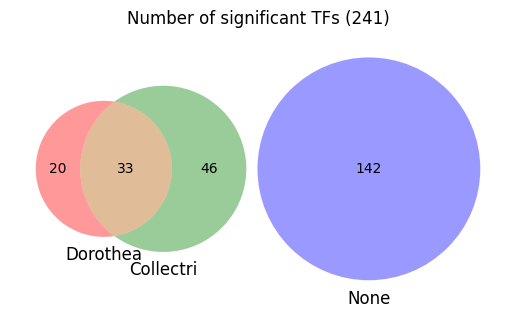

In [ ]:
from matplotlib_venn import venn3

venn = venn3(subsets={
    '100': len(acts_dorothea),  # Only Dorothea
    '010': len(acts_collectri),  # Only Collectri
    '110': len(acts_both),  # Significant in both
    '001': len(acts_none)  # Not significant in either
}, set_labels=('Dorothea', 'Collectri', 'None'))
plt.title('Number of significant TFs (241)')
plt.show()

#### Customs Function

In [ ]:
#@title ##### Function: Calculate the mean correlation of regulons

def calculate_correlation_regulons(tf_lists, name_of_group):
    # tf_lists = matched_columns_filtered.to_list()
    # name_of_group = "collectri"

    # Placeholder for means & Jaccard Index values
    means = []
    weights = []
    sizes = []
    jaccard_indices = []
    jaccard_indices_weight = []
    jaccard_regulons = []

    # Loop through each TF in tf_lists:
    for tf in tf_lists:
        # Filtering to get the target column
        regulons_collectri = collectri.loc[collectri['source'] == tf, ['target','weight']]
        regulons_dorothea = dorothea.loc[dorothea['source'] == tf, ['target','weight']]

        # Filtering the 'mat' DataFrame
        df_mat_collectri = mat[regulons_collectri[regulons_collectri.target.isin(mat.columns)].target.to_list()]
        df_mat_dorothea = mat[regulons_dorothea[regulons_dorothea.target.isin(mat.columns)].target.to_list()]

        # Convert the weight values
        weights_sign_collectri = regulons_collectri.set_index('target').weight.apply(np.sign).to_dict()
        weights_sign_dorothea = regulons_dorothea.set_index('target').weight.apply(np.sign).to_dict()

        # Multiply the matrices by the sign of weight values
        df_mat_collectri_multiplied = df_mat_collectri.copy()
        df_mat_dorothea_multiplied = df_mat_dorothea.copy()
        for col in df_mat_collectri_multiplied.columns:
            df_mat_collectri_multiplied[col] *= weights_sign_collectri.get(col, 1)

        for col in df_mat_dorothea_multiplied.columns:
            df_mat_dorothea_multiplied[col] *= weights_sign_dorothea.get(col, 1)

        # Calculate the size of regulons
        size_collectri = df_mat_collectri_multiplied.shape[1]
        size_dorothea = df_mat_dorothea_multiplied.shape[1]
        sizes.append([tf, size_collectri, size_dorothea])

        # Compute the Pearson correlation
        correlation_collectri = df_mat_collectri_multiplied.corr()
        correlation_dorothea = df_mat_dorothea_multiplied.corr()

        # Sort the correlation matrices by the average correlation value
        sorted_columns_collectri = correlation_collectri.mean().sort_values(ascending=False).index
        sorted_columns_dorothea = correlation_dorothea.mean().sort_values(ascending=False).index

        correlation_collectri = correlation_collectri.loc[sorted_columns_collectri, sorted_columns_collectri]
        correlation_dorothea = correlation_dorothea.loc[sorted_columns_dorothea, sorted_columns_dorothea]

        # Calculate the mean correlation
        # Extract upper triangle of the matrix (excluding the diagonal)
        upper_triangle_collectri = correlation_collectri.where(np.triu(np.ones(correlation_collectri.shape), k=1).astype(bool))
        # Compute the mean of the upper triangle values
        mean_collectri = upper_triangle_collectri.stack().mean()

        # Extract upper triangle of the matrix (excluding the diagonal)
        upper_triangle_dorothea = correlation_dorothea.where(np.triu(np.ones(correlation_dorothea.shape), k=1).astype(bool))
        # Compute the mean of the upper triangle values
        mean_dorothea = upper_triangle_dorothea.stack().mean()

        means.append([tf, mean_collectri, mean_dorothea])

        # Calculate the mean weight
        means_weight_collectri = regulons_collectri.weight.mean()
        means_weight_dorothea = regulons_dorothea.weight.mean()

        weights.append([tf, means_weight_collectri, means_weight_dorothea])

        # Create sets for the targets in each regulon
        targets_collectri = set(regulons_collectri['target'])
        targets_dorothea = set(regulons_dorothea['target'])

        # Get targets that are present in both regulons
        shared_targets = targets_collectri.intersection(targets_dorothea)

        # Compute the intersection and union of the two regulons lists
        intersection = len(targets_collectri.intersection(targets_dorothea))
        union = len(targets_collectri.union(targets_dorothea))

        # Calculate Jaccard Index
        jaccard_index = intersection / union if union != 0 else 0
        jaccard_indices.append([tf, jaccard_index])

        # Filtering the 'mat' DataFrame
        df_mat_collectri = mat[regulons_collectri[regulons_collectri.target.isin(mat.columns)].target.to_list()]
        df_mat_dorothea = mat[regulons_dorothea[regulons_dorothea.target.isin(mat.columns)].target.to_list()]

        # Convert the weight values
        weights_sign_collectri = regulons_collectri.set_index('target').weight.apply(np.sign).to_dict()
        weights_sign_dorothea = regulons_dorothea.set_index('target').weight.apply(np.sign).to_dict()

        # Multiply the matrices by the sign of weight values
        for col in df_mat_collectri.columns:
            df_mat_collectri[col] *= weights_sign_collectri.get(col, 1)

        for col in df_mat_dorothea.columns:
            df_mat_dorothea[col] *= weights_sign_dorothea.get(col, 1)

        # Compute the intersection and union for collectri
        intersection_collectri = len(set(df_mat_collectri.columns).intersection(set(regulons_collectri['target'])))
        union_collectri = len(set(df_mat_collectri.columns).union(set(regulons_collectri['target'])))

        # Compute the intersection and union for dorothea
        intersection_dorothea = len(set(df_mat_dorothea.columns).intersection(set(regulons_dorothea['target'])))
        union_dorothea = len(set(df_mat_dorothea.columns).union(set(regulons_dorothea['target'])))

        # Calculate Jaccard Index for both databases
        jaccard_index_collectri = intersection_collectri / union_collectri if union_collectri != 0 else 0
        jaccard_index_dorothea = intersection_dorothea / union_dorothea if union_dorothea != 0 else 0

        jaccard_regulons.append([tf, jaccard_index_collectri, jaccard_index_dorothea])

        # Check for shared targets with same weight directions
        intersection_count = 0
        for target in shared_targets:
            weight_collectri = regulons_collectri.loc[regulons_collectri['target'] == target, 'weight'].values[0]
            weight_dorothea = regulons_dorothea.loc[regulons_dorothea['target'] == target, 'weight'].values[0]
            if np.sign(weight_collectri) == np.sign(weight_dorothea):
                intersection_count += 1

        # Compute the union by considering all distinct targets
        union_count_weight = len(shared_targets)

        # Calculate Jaccard Index for same weight directions
        jaccard_index_weight = intersection_count / union_count_weight if union_count_weight != 0 else 0
        jaccard_indices_weight.append([tf, jaccard_index_weight])

    # Convert means to DataFrame
    correlation_mean = pd.DataFrame(means, columns=["TF", "regulons_collectri", "regulons_dorothea"])

    # Convert size to DataFrame
    sizes_mean = pd.DataFrame(sizes, columns=["TF", "sizes_collectri", "sizes_dorothea"])

    # Convert weights to DataFrame
    weights_mean = pd.DataFrame(weights, columns=["TF", "weight_collectri", "weight_dorothea"])

    # Convert Jaccard Indices to DataFrame
    jaccard_df = pd.DataFrame(jaccard_indices, columns=["TF", "Jaccard Index"])

    # Convert Jaccard Indices to DataFrame
    jaccard_weight_df = pd.DataFrame(jaccard_indices_weight, columns=["TF", "Jaccard Weight"])

    # Convert Jaccard Regulons Indices to DataFrame
    jaccard_df_regulons = pd.DataFrame(jaccard_regulons, columns=["TF", "Jaccard Collectri", "Jaccard Dorothea"])

    # Merge the correlation_mean and jaccard_df based on TF
    merged_data = pd.merge(correlation_mean, weights_mean, on='TF')
    merged_data = pd.merge(merged_data, sizes_mean, on='TF')
    merged_data = pd.merge(merged_data, jaccard_df, on='TF')
    merged_data = pd.merge(merged_data, jaccard_weight_df, on='TF')
    merged_data = pd.merge(merged_data, jaccard_df_regulons, on='TF')

    # Calculate the mean of each column
    mean_collectri = tf_collectri_acts.mean()
    mean_dorothea = tf_dorothea_acts.mean()

    # Find overlapping column names
    overlap_columns = mean_collectri.index.intersection(mean_dorothea.index).tolist()

    # Construct a new dataframe
    result_df = pd.DataFrame({
        'TF': overlap_columns,
        'tf_collectri': mean_collectri[overlap_columns],
        'tf_dorothea': mean_dorothea[overlap_columns]
    })

    # Merge to get the sorting order from earlier data (based on Jaccard Index)
    merged_result = result_df.reset_index(drop=True).merge(merged_data, on='TF', how='inner')

    # Adding a new column for marker type based on the conditions provided
    conditions = [
        (merged_result['tf_collectri'] > 0) & (merged_result['tf_dorothea'] > 0),
        (merged_result['tf_collectri'] < 0) & (merged_result['tf_dorothea'] < 0),
        (merged_result['tf_collectri'] > 0) & (merged_result['tf_dorothea'] < 0),
        (merged_result['tf_collectri'] < 0) & (merged_result['tf_dorothea'] > 0)
    ]

    choices = ['o', 's', '^', 'v'] # circle, square, triangle_up, triangle_down

    merged_result['marker'] = np.select(conditions, choices, default='o')

    def classify_tf_group(row):
        tf_col = row['tf_collectri']
        tf_dor = row['tf_dorothea']

        if tf_col > 0 and tf_dor > 0:
            if (tf_col - tf_dor) / (tf_col + tf_dor) > 0.10:
                return 2
            elif (tf_dor - tf_col) / (tf_col + tf_dor) > 0.10 :
                return 3
            else:
                return 1
        elif tf_col < 0 and tf_dor < 0:
            if (tf_col - tf_dor) / (tf_col + tf_dor) > 0.10:
                return 5
            elif (tf_dor - tf_col) / (tf_col + tf_dor) > 0.10 :
                return 6
            else:
                return 4
        elif tf_col > 0 and tf_dor < 0:
            return 7
        elif tf_col < 0 and tf_dor > 0:
            return 8

    merged_result['tf_group'] = merged_result.apply(classify_tf_group, axis=1)

    # Define a function to classify each row
    def classify_significant_group(row):
        if row['TF'] in acts_collectri:
            return 1
        elif row['TF'] in acts_dorothea:
            return 2
        elif row['TF'] in acts_both:
            return 3
        elif row['TF'] in acts_none:
            return 4
        else:  # Handle cases where 'TF' is not in any of the provided lists
            return np.nan  # Assign NaN or some placeholder value to unspecified cases

    # Apply the function to each row to create the 'significant_group' column
    merged_result['significant_group'] = merged_result.apply(classify_significant_group, axis=1)

    # Sort the merged data by Jaccard Index in descending order
    merged_result = merged_result.sort_values(by='Jaccard Index', ascending=False)

    merged_result.to_csv(f"merged_result_{name_of_group}.csv",index=False)
    return merged_result

In [ ]:
#@title ##### Function: Scatter plot of TF activity score

def plot_tf_scatterplot(df_dataframe, name_of_group, show_text=True, color_by="tf_group"):
    # df_dataframe = df_collectri
    # name_of_group = "collectri"

    plt.figure(figsize=(6, 4))

    # Create a colormap based on unique tf_group
    if color_by == "tf_group":
        # Green, Red, Orange, Blue, Purple, Pink, Dark Grey, Light Grey
        cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "significant_group":
        # Purple, Green, Yellow, Grey
        cmap = ["#836ada","#38cf33","#fff23f","#a9a9a9"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "variable":
        # Blue, Red
        cmap = ["#42acff","#f04848"]
        color_dict = dict(zip([f'{prefix}_collectri', f'{prefix}_dorothea'], cmap))
    else:
        color_dict = sns.color_palette("deep")

    sns.scatterplot(data=df_dataframe, x="tf_dorothea", y="tf_collectri", hue=color_by, palette=color_dict)
    # sns.scatterplot(data=merged_result, x="tf_dorothea", y="tf_collectri", hue="TF", palette=color_dict)
    # Add TF names as text on the graph
    if show_text:
        for index, row in df_dataframe.iterrows():
            plt.text(row['tf_dorothea'], row['tf_collectri'], row['TF'], fontsize=9, ha='right')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    # 45-degree line
    # plt.plot([min(df_dataframe["tf_dorothea"].min(), df_dataframe["tf_collectri"].min()),
    #           max(df_dataframe["tf_dorothea"].max(), df_dataframe["tf_collectri"].max())],
    #         [min(df_dataframe["tf_dorothea"].min(), df_dataframe["tf_collectri"].min()),
    #           max(df_dataframe["tf_dorothea"].max(), df_dataframe["tf_collectri"].max())],
    #         color='gray', linestyle='--')
    plt.plot([-14,29],[-14,29],
            color='gray', linestyle='--')
    plt.xlim(-14, 29)
    plt.ylim(-14, 29)
    plt.title(f"TFs activity - {name_of_group}", y=1.02)
    plt.xlabel("Dorothea Mean Value")
    plt.ylabel("Collectri Mean Value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
#@title ##### Function: Box plot of Jaccard Index

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

def plot_jaccard_boxplot(df_dataframe, name_of_group):
    # Find max of the graph
    xmax = df_dataframe['Jaccard Index'].max()

    # Ensure "tf_group" contains all values from 1 to 8
    tf_groups = set(range(1, 9))
    df_dataframe['tf_group'] = df_dataframe['tf_group'].astype(pd.CategoricalDtype(categories=tf_groups, ordered=True))

    # Create a colormap based on unique tf_group
    cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
    color_dict = dict(zip(np.linspace(1, len(cmap), num=len(cmap)), cmap))

    plt.figure(figsize=(3, 6))
    ax = sns.boxplot(y='tf_group', x='Jaccard Index', data=df_dataframe, palette=color_dict)
    ax.set_yticklabels(ax.get_yticklabels())

    # Annotate number of members in each group
    for i, group in enumerate(tf_groups):
        group_count = len(df_dataframe[df_dataframe['tf_group'] == group])
        ax.text(xmax + 0.1 * xmax, i, f'n={group_count}', ha='left', va='center')

    # Compute ANOVA statistics and annotate
    pairs = []
    for i in tf_groups:
        for j in tf_groups:
            if i < j:
                group_i = df_dataframe[df_dataframe['tf_group'] == i]['Jaccard Index'].dropna()
                group_j = df_dataframe[df_dataframe['tf_group'] == j]['Jaccard Index'].dropna()

                if not group_i.empty and not group_j.empty:
                    _, p_value = stats.f_oneway(group_i, group_j)
                    pairs.append(((i, j), p_value))
                    if p_value < 0.05:
                        print(f"Paired group {i} and {j} is significant with p-value: {p_value:.4f}")

    ax.set_xlabel('')
    ax.set_xlim([ -0.05, 0.45 ])
    plt.title(f"Box plot of Jaccard Index - {name_of_group}", y=1.02)
    plt.show()

# def plot_jaccard_boxplot(df_dataframe, name_of_group):
#     # df_dataframe = df_collectri
#     # name_of_group = "collectri"

#     # Find max of the graph
#     ymax = df_dataframe['Jaccard Index'].max()

#     # Ensure "tf_group" contains all values from 1 to 8
#     tf_groups = set(range(1, 9))
#     df_dataframe['tf_group'] = df_dataframe['tf_group'].astype(pd.CategoricalDtype(categories=tf_groups, ordered=True))

#     # Create a colormap based on unique tf_group
#     # Green, Red, Orange, Blue, Purple, Pink, Dark Grey, Light Grey
#     cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
#     color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))

#     plt.figure(figsize=(8, 6))
#     ax = sns.boxplot(x='tf_group', y='Jaccard Index', data=df_dataframe, palette=color_dict)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#     # Annotate number of members in each group
#     for i, group in enumerate(tf_groups):
#         group_count = len(df_dataframe[df_dataframe['tf_group'] == group])
#         ax.text(i, 1.01, f'n={group_count}', ha='center', va='bottom', transform=ax.get_xaxis_transform())

#     # Compute ANOVA statistics and annotate
#     pairs = []
#     for i in tf_groups:
#         for j in tf_groups:
#             if i < j:
#                 group_i = df_dataframe[df_dataframe['tf_group'] == i]['Jaccard Index'].dropna()
#                 group_j = df_dataframe[df_dataframe['tf_group'] == j]['Jaccard Index'].dropna()

#                 if not group_i.empty and not group_j.empty:
#                     _, p_value = stats.f_oneway(group_i, group_j)
#                     pairs.append(((i, j), p_value))
#                     if p_value < 0.05:
#                         # Assuming the p_value < 0.05 is considered as significant
#                         # ax.annotate('*', xy=(np.mean([i - 1, j - 1]), max(max(group_i), max(group_j))), ha='center')
#                         print(f"Paired group {i} and {j} is significant with p-value: {p_value:.4f}")

#     # Adjusting and adding custom annotations, lines, etc can be done using plt.annotate(), plt.text(), plt.plot(), etc.
#     plt.title(f"Box plot of Jaccard Index - {name_of_group}", y=1.08)
#     plt.show()


In [ ]:
#@title ##### Function: Box plot between CollecTRI and DoRothEA

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import wilcoxon
import colorsys

def plot_horizontal_boxplot(df_dataframe, name_of_group, prefix="regulons", color_by="variable"):

    # Ensure tf_group is categorical and has categories from 1 to 8
    df_dataframe['tf_group'] = pd.Categorical(df_dataframe['tf_group'], categories=range(1, 9), ordered=True)

    # Sort the dataframe
    df_dataframe = df_dataframe.sort_values(by='tf_group', ascending=True)

    # Loop through each unique group and perform Wilcoxon test
    for group in df_dataframe['tf_group'].unique():
        group_df = df_dataframe[df_dataframe['tf_group'] == group]

        # Wilcoxon Test
        stat, p_value = wilcoxon(group_df[f'{prefix}_collectri'], group_df[f'{prefix}_dorothea'])
        print(f"Group {group} - Wilcoxon Test P-value: {p_value:0.4f}")

    # Melt the dataframe
    df_melted = df_dataframe.melt(id_vars='tf_group', value_vars=[f'{prefix}_collectri', f'{prefix}_dorothea'])

    # Create a colormap based on unique tf_group
    if color_by == "tf_group":
        # Green, Red, Orange, Blue, Purple, Pink, Dark Grey, Light Grey
        cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "significant_group":
        # Purple, Green, Yellow, Grey
        cmap = ["#836ada","#38cf33","#fff23f","#a9a9a9"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "variable":
        # Blue, Red
        cmap = ["#42acff","#f04848"]
        color_dict = dict(zip([f'{prefix}_collectri', f'{prefix}_dorothea'], cmap))
    else:
        color_dict = sns.color_palette("deep")

    # Plot horizontal boxplot
    plt.figure(figsize=(3,6))
    ax = sns.boxplot(x='value', y='tf_group', hue=color_by, data=df_melted, orient='h', palette=color_dict)
    ax.set_xlabel('')
    ax.legend_.remove()
    if prefix == "regulons":
        ax.set_xlim([ -0.25, 0.8 ])
        ax.set_title(f'Regulons Correlation - {name_of_group}', y=1.02)
    elif prefix == "weight":
        ax.set_xlim([ -0.05, 0.45 ])
        ax.set_title(f'Absolute Weight - {name_of_group}', y=1.02)
    elif prefix == "sizes":
        ax.set_xlim([ -0.05, 0.45 ])
        ax.set_title(f'Size - {name_of_group}', y=1.02)
    else:
        ax.set_title(f'Box plot - {name_of_group}', y=1.02)

    plt.tight_layout()
    plt.show()

#### 1. Both CollecTRI and DoRothEA

In [ ]:
df_both = calculate_correlation_regulons(list(acts_both), "both")
df_both.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
18,RELA,3.242743,-8.601547,0.087019,0.065716,0.779359,0.868313,333,179,0.265723,0.952663,0.592527,0.736626,^,7,3
22,SP1,10.333795,8.160373,0.090725,0.052092,0.929641,0.923858,862,278,0.245500,0.979472,0.645210,0.705584,o,2,3
30,USF1,6.551861,4.037597,0.130901,0.162630,0.876652,0.943925,127,74,0.237037,0.968750,0.559471,0.691589,o,2,3
31,USF2,3.730333,3.171366,0.072704,0.265408,0.878261,0.982759,63,94,0.215789,1.000000,0.547826,0.810345,o,1,3
10,HIF1A,10.270652,5.106548,0.030776,0.016285,0.887689,0.992366,325,214,0.214405,0.976562,0.701944,0.816794,o,2,3


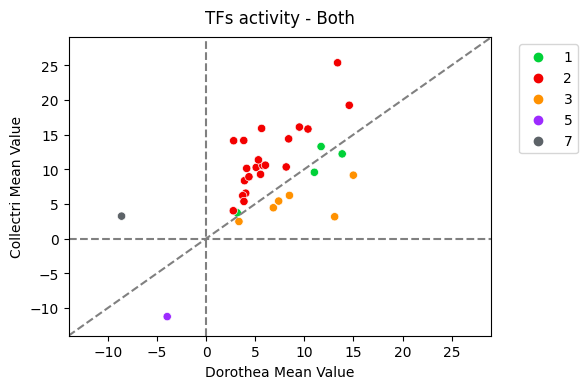

In [ ]:
plot_tf_scatterplot(df_both, "Both", show_text=False)

Paired group 2 and 7 is significant with p-value: 0.0385
Paired group 3 and 7 is significant with p-value: 0.0333


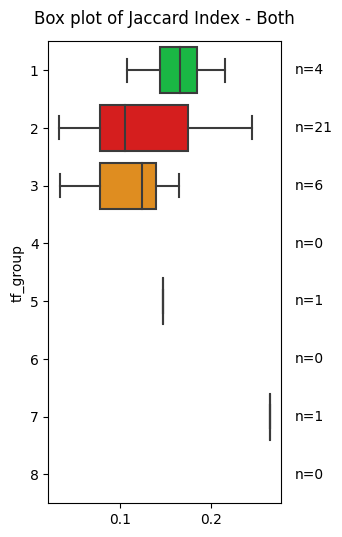

In [ ]:
plot_jaccard_boxplot(df_both, "Both")

Group 1 - Wilcoxon Test P-value: 0.6250
Group 2 - Wilcoxon Test P-value: 0.0090
Group 3 - Wilcoxon Test P-value: 0.5625
Group 5 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 1.0000


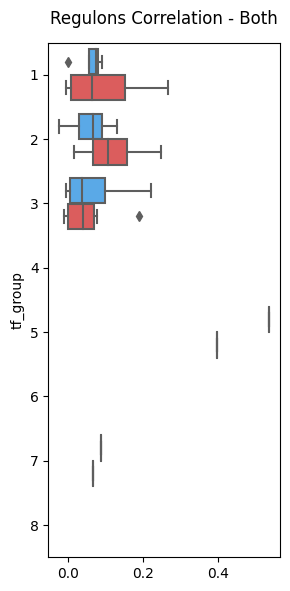

In [ ]:
plot_horizontal_boxplot(df_both, "Both")

Group 1 - Wilcoxon Test P-value: 0.1250
Group 2 - Wilcoxon Test P-value: 0.0000
Group 3 - Wilcoxon Test P-value: 0.0312
Group 5 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 1.0000


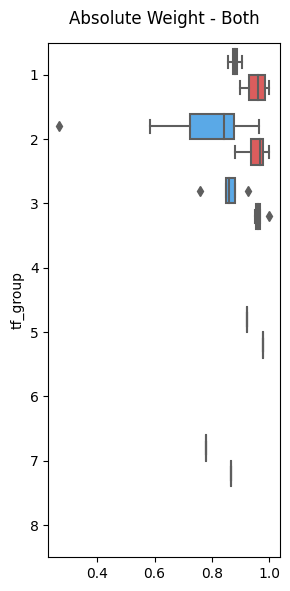

In [ ]:
plot_horizontal_boxplot(df_both, "Both", prefix="weight")

Group 1 - Wilcoxon Test P-value: 1.0000
Group 2 - Wilcoxon Test P-value: 0.6827
Group 3 - Wilcoxon Test P-value: 0.8438
Group 5 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 1.0000


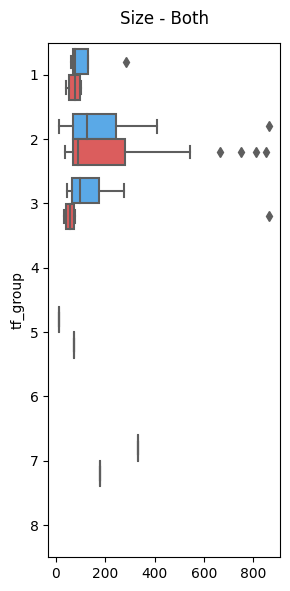

In [ ]:
plot_horizontal_boxplot(df_both, "Both", prefix="sizes")

#### 2. CollecTRI alone

In [ ]:
df_collectri = calculate_correlation_regulons(list(acts_collectri), "collectri")
df_collectri.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
10,FOXO4,2.275198,0.685210,0.436830,0.333672,0.741935,1.000000,20,11,0.243243,1.000000,0.645161,0.733333,o,2,1
14,IRF1,-4.083889,0.039873,0.402418,0.306347,0.741176,0.927711,95,60,0.187793,0.975000,0.558824,0.722892,v,8,1
44,YY1,7.599409,0.782545,0.045595,0.007972,0.360902,0.436893,166,90,0.186495,0.948276,0.624060,0.873786,o,2,1
34,SMAD4,22.575455,1.962374,-0.009303,0.042733,0.760563,0.948052,86,63,0.171123,0.937500,0.605634,0.818182,o,2,1
1,AR,7.904081,2.549876,0.126851,0.142548,0.828794,0.937778,353,172,0.161950,0.980583,0.686770,0.764444,o,2,1


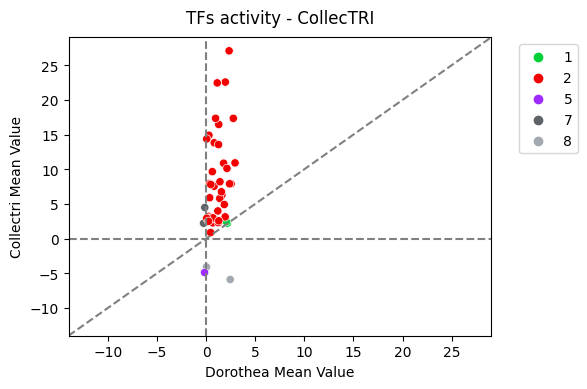

In [ ]:
plot_tf_scatterplot(df_collectri, "CollecTRI", show_text=False)

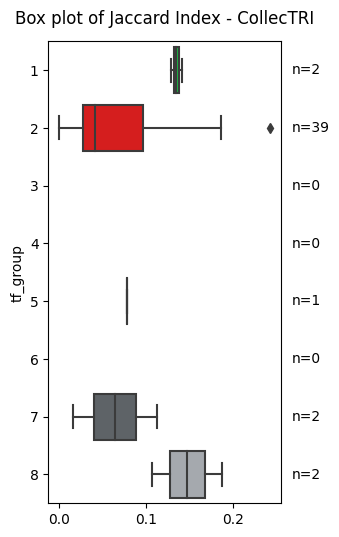

In [ ]:
plot_jaccard_boxplot(df_collectri, "CollecTRI")

Group 1 - Wilcoxon Test P-value: 0.5000
Group 2 - Wilcoxon Test P-value: 0.0322
Group 5 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 0.5000
Group 8 - Wilcoxon Test P-value: 1.0000


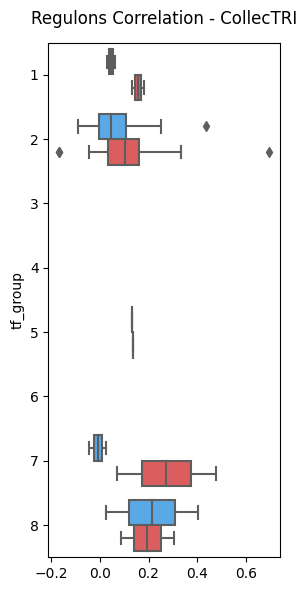

In [ ]:
plot_horizontal_boxplot(df_collectri, "CollecTRI")

Group 1 - Wilcoxon Test P-value: 0.5000
Group 2 - Wilcoxon Test P-value: 0.0000
Group 5 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 0.5000
Group 8 - Wilcoxon Test P-value: 0.5000


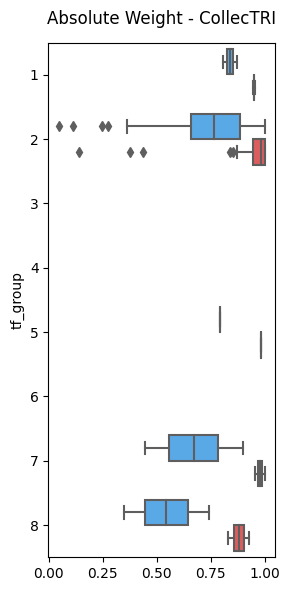

In [ ]:
plot_horizontal_boxplot(df_collectri, "CollecTRI", prefix="weight")

Group 1 - Wilcoxon Test P-value: 1.0000
Group 2 - Wilcoxon Test P-value: 0.0037
Group 5 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 1.0000
Group 8 - Wilcoxon Test P-value: 0.5000


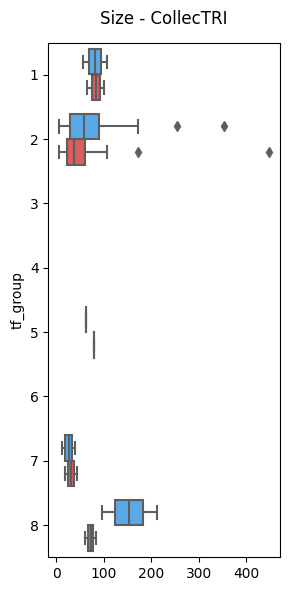

In [ ]:
plot_horizontal_boxplot(df_collectri, "CollecTRI", prefix="sizes")

#### 3. DoRothEA alone

In [ ]:
df_dorothea = calculate_correlation_regulons(list(acts_dorothea), "dorothea")
df_dorothea.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
12,MYC,1.929774,4.317483,0.074771,0.134906,0.810811,0.909677,701,402,0.402073,0.984536,0.789414,0.864516,o,3,2
13,NFKB1,0.286096,-7.189415,0.110531,0.173820,0.833718,0.912000,246,171,0.336595,0.988372,0.568129,0.684000,^,7,2
18,WT1,2.468180,3.643310,0.018797,-0.040092,0.541401,0.032258,101,20,0.197452,0.935484,0.643312,0.645161,o,3,2
17,TP53,4.234194,8.754877,0.102666,0.104310,0.646341,0.812395,757,489,0.188722,0.936255,0.769309,0.819095,o,3,2
0,ATF6,1.893479,3.333752,-0.013667,-0.093634,0.724138,1.000000,42,10,0.172414,1.000000,0.724138,1.000000,o,3,2


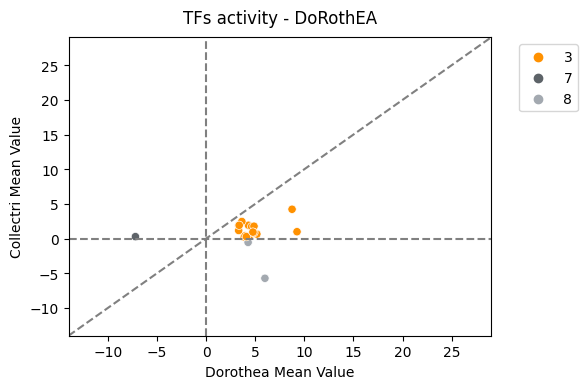

In [ ]:
plot_tf_scatterplot(df_dorothea, "DoRothEA", show_text=False)

Paired group 3 and 7 is significant with p-value: 0.0324
Paired group 7 and 8 is significant with p-value: 0.0173


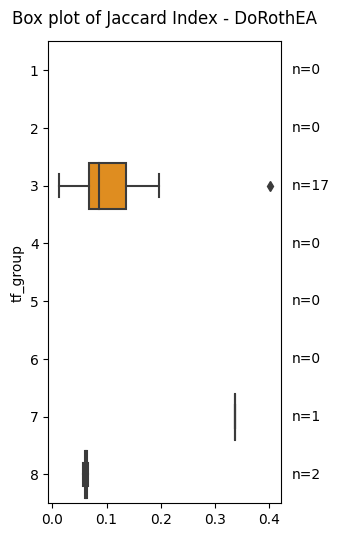

In [ ]:
plot_jaccard_boxplot(df_dorothea, "DoRothEA")

Group 3 - Wilcoxon Test P-value: 0.2633
Group 7 - Wilcoxon Test P-value: 1.0000
Group 8 - Wilcoxon Test P-value: 0.5000


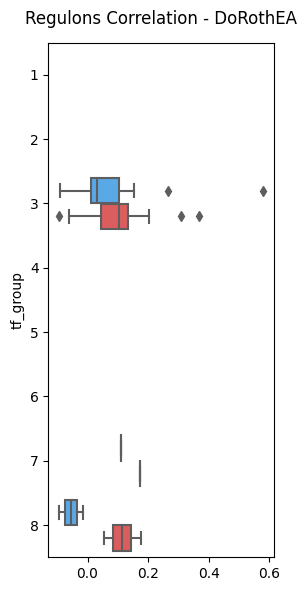

In [ ]:
plot_horizontal_boxplot(df_dorothea, "DoRothEA")

Group 3 - Wilcoxon Test P-value: 0.0157
Group 7 - Wilcoxon Test P-value: 1.0000
Group 8 - Wilcoxon Test P-value: 0.5000


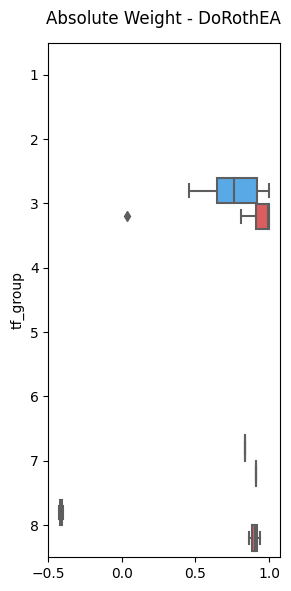

In [ ]:
plot_horizontal_boxplot(df_dorothea, "DoRothEA", prefix="weight")

Group 3 - Wilcoxon Test P-value: 0.3289
Group 7 - Wilcoxon Test P-value: 1.0000
Group 8 - Wilcoxon Test P-value: 0.5000


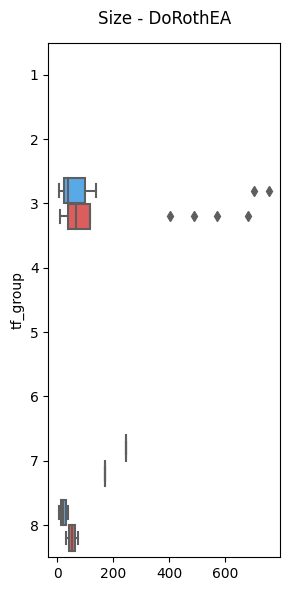

In [ ]:
plot_horizontal_boxplot(df_dorothea, "DoRothEA", prefix="sizes")

#### 4. Non-significant

In [ ]:
df_none = calculate_correlation_regulons(list(acts_none), "none")
df_none.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
124,STAT4,-0.066540,0.451966,0.203497,0.060989,0.875000,0.846154,12,9,0.285714,1.000000,0.375000,0.692308,v,8,4
20,E2F2,-0.828310,0.123315,0.010644,0.036212,0.760000,1.000000,44,21,0.241379,1.000000,0.880000,0.954545,v,8,4
32,ETS2,1.568436,-0.291356,0.172205,0.177570,0.929825,1.000000,66,19,0.239316,0.964286,0.578947,0.612903,^,7,4
21,E2F3,0.949929,0.303872,0.011571,-0.000467,0.941176,1.000000,60,12,0.205882,1.000000,0.882353,0.857143,o,2,4
19,E2F1,0.668307,3.071709,0.024950,0.078238,0.791139,0.963225,263,606,0.196491,0.994048,0.832278,0.857143,o,3,4


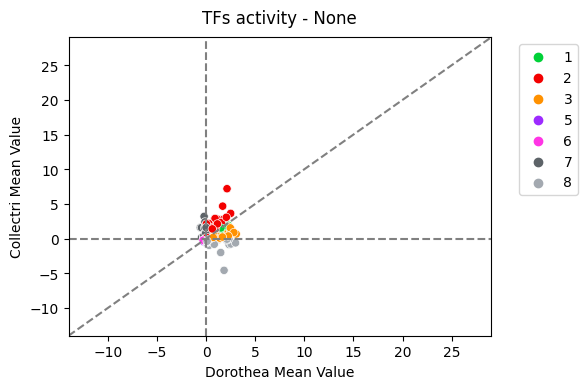

In [ ]:
plot_tf_scatterplot(df_none, "None", show_text=False)

Paired group 1 and 6 is significant with p-value: 0.0369


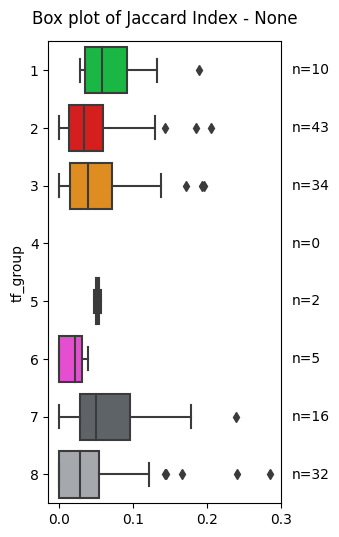

In [ ]:
plot_jaccard_boxplot(df_none, "None")

Group 1 - Wilcoxon Test P-value: 0.0645
Group 2 - Wilcoxon Test P-value: 0.0003
Group 3 - Wilcoxon Test P-value: 0.0017
Group 5 - Wilcoxon Test P-value: 1.0000
Group 6 - Wilcoxon Test P-value: 0.6250
Group 7 - Wilcoxon Test P-value: 0.0250
Group 8 - Wilcoxon Test P-value: 0.0240


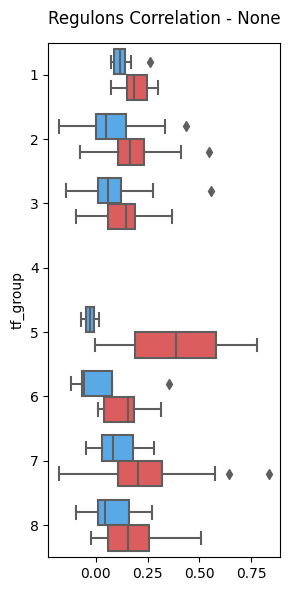

In [ ]:
plot_horizontal_boxplot(df_none, "None")

Group 1 - Wilcoxon Test P-value: 0.0039
Group 2 - Wilcoxon Test P-value: 0.0000
Group 3 - Wilcoxon Test P-value: 0.0000
Group 5 - Wilcoxon Test P-value: 0.5000
Group 6 - Wilcoxon Test P-value: 0.0625
Group 7 - Wilcoxon Test P-value: 0.0063
Group 8 - Wilcoxon Test P-value: 0.0000


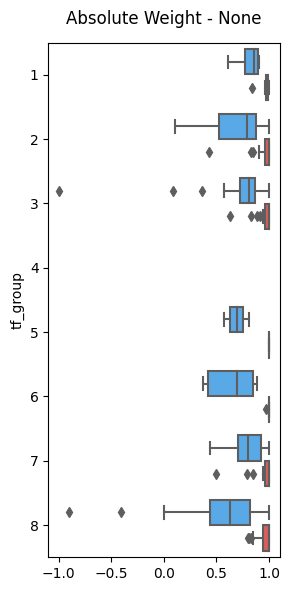

In [ ]:
plot_horizontal_boxplot(df_none, "None", prefix="weight")

Group 1 - Wilcoxon Test P-value: 0.0840
Group 2 - Wilcoxon Test P-value: 0.6390
Group 3 - Wilcoxon Test P-value: 0.0007
Group 5 - Wilcoxon Test P-value: 0.3173
Group 6 - Wilcoxon Test P-value: 0.1250
Group 7 - Wilcoxon Test P-value: 0.9799
Group 8 - Wilcoxon Test P-value: 0.0024


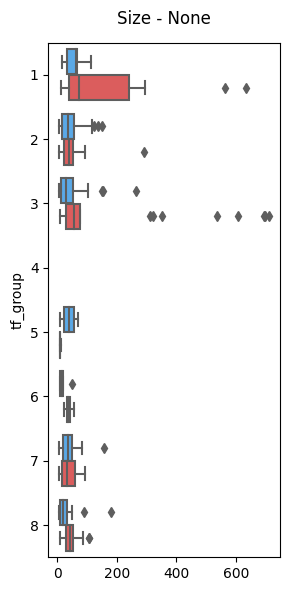

In [ ]:
plot_horizontal_boxplot(df_none, "None", prefix="sizes")

#### 5. Full Overlap List

In [ ]:
df_all = calculate_correlation_regulons(list(overlap_tfs), "all")
df_all.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
126,MYC,1.929774,4.317483,0.074771,0.134906,0.810811,0.909677,701,402,0.402073,0.984536,0.789414,0.864516,o,3,2
139,NFKB1,0.286096,-7.189415,0.110531,0.173820,0.833718,0.912000,246,171,0.336595,0.988372,0.568129,0.684000,^,7,2
203,STAT4,-0.066540,0.451966,0.203497,0.060989,0.875000,0.846154,12,9,0.285714,1.000000,0.375000,0.692308,v,8,4
171,RELA,3.242743,-8.601547,0.087019,0.065716,0.779359,0.868313,333,179,0.265723,0.952663,0.592527,0.736626,^,7,3
191,SP1,10.333795,8.160373,0.090725,0.052092,0.929641,0.923858,862,278,0.245500,0.979472,0.645210,0.705584,o,2,3


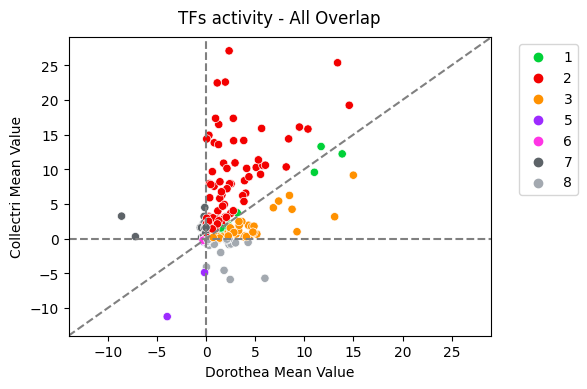

In [ ]:
plot_tf_scatterplot(df_all, "All Overlap", show_text=False)

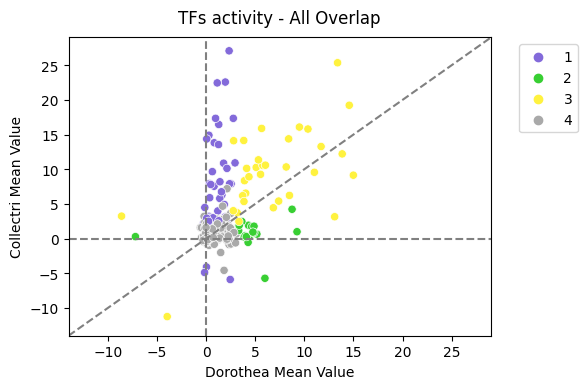

In [ ]:
plot_tf_scatterplot(df_all, "All Overlap", show_text=False, color_by="significant_group")

Paired group 1 and 2 is significant with p-value: 0.0376
Paired group 1 and 6 is significant with p-value: 0.0059
Paired group 1 and 8 is significant with p-value: 0.0270
Paired group 5 and 6 is significant with p-value: 0.0223


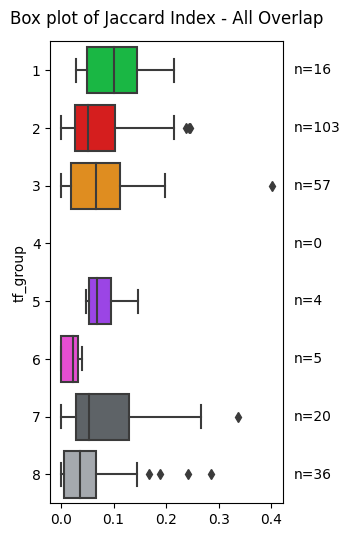

In [ ]:
plot_jaccard_boxplot(df_all, "All Overlap")

Group 1 - Wilcoxon Test P-value: 0.0182
Group 2 - Wilcoxon Test P-value: 0.0000
Group 3 - Wilcoxon Test P-value: 0.0025
Group 5 - Wilcoxon Test P-value: 1.0000
Group 6 - Wilcoxon Test P-value: 0.6250
Group 7 - Wilcoxon Test P-value: 0.0107
Group 8 - Wilcoxon Test P-value: 0.0153


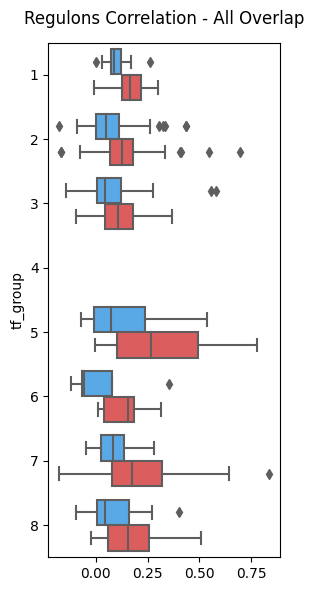

In [ ]:
plot_horizontal_boxplot(df_all, "All Overlap")

Group 1 - Wilcoxon Test P-value: 0.0001
Group 2 - Wilcoxon Test P-value: 0.0000
Group 3 - Wilcoxon Test P-value: 0.0000
Group 5 - Wilcoxon Test P-value: 0.1250
Group 6 - Wilcoxon Test P-value: 0.0625
Group 7 - Wilcoxon Test P-value: 0.0014
Group 8 - Wilcoxon Test P-value: 0.0000


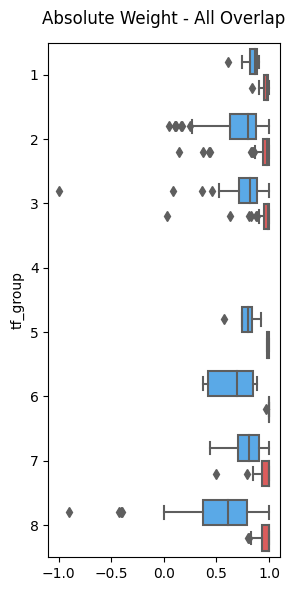

In [ ]:
plot_horizontal_boxplot(df_all, "All Overlap", prefix="weight")

Group 1 - Wilcoxon Test P-value: 0.1754
Group 2 - Wilcoxon Test P-value: 0.1378
Group 3 - Wilcoxon Test P-value: 0.0043
Group 5 - Wilcoxon Test P-value: 0.5930
Group 6 - Wilcoxon Test P-value: 0.1250
Group 7 - Wilcoxon Test P-value: 0.5217
Group 8 - Wilcoxon Test P-value: 0.0101


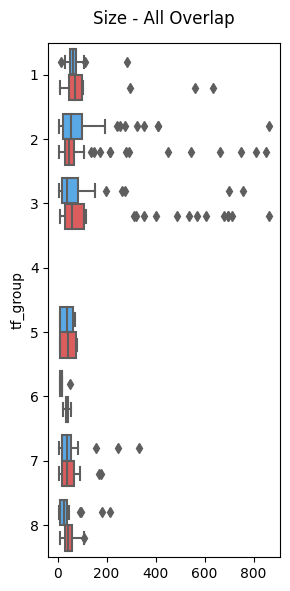

In [ ]:
plot_horizontal_boxplot(df_all, "All Overlap", prefix="sizes")

### **TASK 2** With DEA

#### Run Deseq2

In [ ]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata_filtered,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 201.15 seconds.

Fitting dispersion trend curve...
... done in 11.88 seconds.

Fitting MAP dispersions...
... done in 204.40 seconds.

Fitting LFCs...
... done in 13.43 seconds.

Refitting 0 outliers.



In [ ]:
# Extract contrast between COVID-19 vs normal
stat_res = DeseqStats(dds, contrast=["condition", 'treatment', 'control'], n_cpus=8)

# Compute Wald test
stat_res.summary()

Running Wald tests...
... done in 4.80 seconds.



Log2 fold change & Wald test p-value: condition treatment vs control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
RP11-34P13.7,45.820190,0.067094,0.294257,0.228010,0.819639,0.871654
RP11-34P13.8,29.560568,-0.086227,0.249617,-0.345438,0.729765,0.801351
CICP27,106.257057,0.144798,0.177248,0.816925,0.413971,0.521994
FO538757.2,33.114796,-0.634443,0.286075,-2.217747,0.026572,0.050794
AP006222.2,67.154701,0.579098,0.270626,2.139848,0.032367,0.060587
...,...,...,...,...,...,...
MT-ND6,17962.507812,-0.445816,0.278378,-1.601475,0.109272,0.175000
MT-TE,1284.633179,-0.343227,0.287943,-1.191996,0.233263,0.330373
MT-CYB,55097.121094,-0.323882,0.302438,-1.070903,0.284213,0.387995


In [ ]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_treatment_vs_control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition treatment vs control


... done in 30.62 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
RP11-34P13.7,45.820190,0.050407,0.271447,0.228010,0.819639,0.871654
RP11-34P13.8,29.560568,-0.068949,0.234608,-0.345438,0.729765,0.801351
CICP27,106.257057,0.129368,0.172303,0.816925,0.413971,0.521994
FO538757.2,33.114796,-0.523892,0.280505,-2.217747,0.026572,0.050794
AP006222.2,67.154701,0.483006,0.266258,2.139848,0.032367,0.060587
...,...,...,...,...,...,...
MT-ND6,17962.507812,-0.240886,0.260519,-1.601475,0.109272,0.175000
MT-TE,1284.633179,-0.265368,0.273098,-1.191996,0.233263,0.330373
MT-CYB,55097.121094,-0.523154,0.297741,-1.070903,0.284213,0.387995


In [ ]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
RP11-34P13.7,45.820190,0.050407,0.271447,0.228010,0.819639,0.871654
RP11-34P13.8,29.560568,-0.068949,0.234608,-0.345438,0.729765,0.801351
CICP27,106.257057,0.129368,0.172303,0.816925,0.413971,0.521994
FO538757.2,33.114796,-0.523892,0.280505,-2.217747,0.026572,0.050794
AP006222.2,67.154701,0.483006,0.266258,2.139848,0.032367,0.060587
...,...,...,...,...,...,...
MT-ND6,17962.507812,-0.240886,0.260519,-1.601475,0.109272,0.175000
MT-TE,1284.633179,-0.265368,0.273098,-1.191996,0.233263,0.330373
MT-CYB,55097.121094,-0.523154,0.297741,-1.070903,0.284213,0.387995


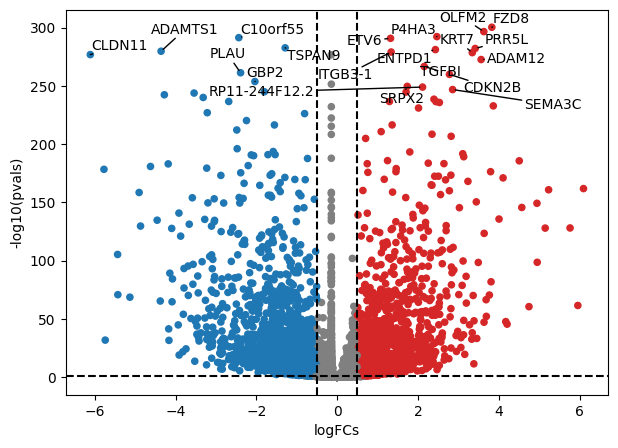

In [ ]:
dc.plot_volcano_df(results_df, x='log2FoldChange', y='padj', top=20)

In [ ]:
mat_dea = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat_dea

GeneName,RP11-34P13.7,RP11-34P13.8,CICP27,FO538757.2,AP006222.2,RP4-669L17.10,MTND1P23,MTND2P28,AC114498.1,MIR6723,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
treatment.vs.control,0.22801,-0.345438,0.816925,-2.217747,2.139848,-0.422515,-1.373661,-0.53866,-2.845663,-3.862065,...,-1.472827,0.550156,0.704443,1.049607,-1.283784,-1.601475,-1.191996,-1.070903,-1.49019,-2.362806


#### Calculate the TF activity

In [ ]:
# Infer TF activities with ulm using CollecTRI network
tf_collectri_acts, tf_collectri_pvals = dc.run_ulm(mat=mat_dea, net=collectri, verbose=True)
tf_collectri_acts
# tf_collectri_acts.apply([np.sum, np.min, np.max], axis=1)
# tf_collectri_acts.shape

Running ulm on mat with 1 samples and 17575 targets for 629 sources.


,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,ARID4A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-1.757547,-2.041153,-1.317381,-2.718874,-2.338848,0.178885,-6.441076,1.41085,2.23362,-0.704351,...,-1.164189,-0.933699,2.687641,1.499925,-1.249124,-1.407664,-0.820707,0.485734,2.157814,0.865133


In [ ]:
# Infer TF activities with ulm using DoRothEA network
tf_dorothea_acts, tf_dorothea_pvals = dc.run_ulm(mat=mat_dea, net=dorothea, verbose=True)
tf_dorothea_acts
# tf_dorothea_acts.apply([np.sum, np.min, np.max], axis=1)
# tf_dorothea_acts.shape

Running ulm on mat with 1 samples and 17575 targets for 281 sources.


,AHR,AR,ARID2,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,...,ZNF217,ZNF24,ZNF263,ZNF274,ZNF384,ZNF584,ZNF592,ZNF639,ZNF644,ZNF740
treatment.vs.control,-1.356595,-1.191591,1.222789,-0.099114,0.171455,-0.742332,-0.307564,1.659851,0.177354,2.299148,...,-0.511702,-0.383074,-3.014316,-1.573798,1.580634,-0.559765,-0.931549,1.498557,1.402702,0.935434


In [ ]:
# Filter p-value < 0.05 in collectri TF activity
tf_collectri_acts_filtered = tf_collectri_acts.loc[:, tf_collectri_pvals.lt(0.05).all()]
tf_collectri_acts_filtered.shape

(1, 174)

In [ ]:
# Filter p-value < 0.05 in dorothea TF activity
tf_dorothea_acts_filtered = tf_dorothea_acts.loc[:, tf_dorothea_pvals.lt(0.05).all()]
tf_dorothea_acts_filtered.shape

(1, 86)

#### Classify the Overlap TF into groups (by significant)

In [ ]:
significant_tf_collectri = tf_collectri_pvals.columns[(tf_collectri_pvals < 0.05).all()]
significant_tf_dorothea = tf_dorothea_pvals.columns[(tf_dorothea_pvals < 0.05).all()]

# Find the overlapping TFs between collectri and dorothea
overlap_tfs = set(tf_collectri_acts.columns) & set(tf_dorothea_acts.columns)

# Classify into 4 groups
acts_collectri = overlap_tfs & set(significant_tf_collectri) - set(significant_tf_dorothea)
acts_dorothea = overlap_tfs & set(significant_tf_dorothea) - set(significant_tf_collectri)
acts_both = overlap_tfs & set(significant_tf_collectri) & set(significant_tf_dorothea)
acts_none = overlap_tfs - acts_collectri - acts_dorothea - acts_both

# Convert set objects to lists
acts_collectri = list(acts_collectri)
acts_dorothea = list(acts_dorothea)
acts_both = list(acts_both)
acts_none = list(acts_none)

# Print the result
print(f"acts_collectri: {len(acts_collectri):d}")
print(f"acts_dorothea: {len(acts_dorothea):d}")
print(f"acts_both: {len(acts_both):d}")
print(f"acts_none: {len(acts_none):d}")
print(f"acts_sum: {len(acts_collectri)+len(acts_dorothea)+len(acts_both)+len(acts_none):d}")

acts_collectri: 37
acts_dorothea: 43
acts_both: 39
acts_none: 122
acts_sum: 241


In [ ]:
mean_acts_collectri = tf_collectri_acts[acts_collectri].mean(axis=0)
mean_acts_dorothea = tf_collectri_acts[acts_dorothea].mean(axis=0)
mean_acts_both = (tf_collectri_acts[acts_both] + tf_dorothea_acts[acts_both]) / 2
mean_acts_none = (tf_collectri_acts[acts_none] + tf_dorothea_acts[acts_none]) / 2

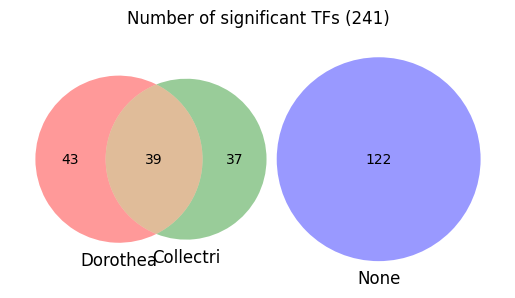

In [ ]:
from matplotlib_venn import venn3

venn = venn3(subsets={
    '100': len(acts_dorothea),  # Only Dorothea
    '010': len(acts_collectri),  # Only Collectri
    '110': len(acts_both),  # Significant in both
    '001': len(acts_none)  # Not significant in either
}, set_labels=('Dorothea', 'Collectri', 'None'))
plt.title('Number of significant TFs (241)')
plt.show()

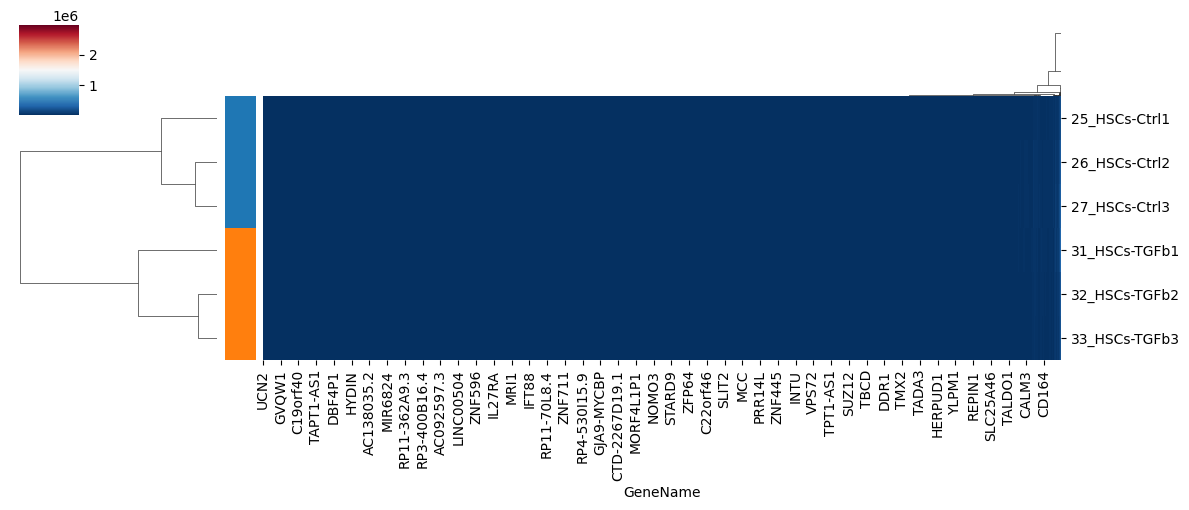

In [ ]:
# Plot heatmap with row dendrogram
sc.pl.clustermap(adata_filtered, obs_keys='condition', cmap="RdBu_r", figsize=(12,5))

#### Customs Function

In [ ]:
#@title ##### Function: Calculate the mean correlation of regulons

def calculate_correlation_regulons(tf_lists, name_of_group):
    # tf_lists = matched_columns_filtered.to_list()
    # name_of_group = "collectri"

    # Placeholder for means & Jaccard Index values
    means = []
    weights = []
    sizes = []
    jaccard_indices = []
    jaccard_indices_weight = []
    jaccard_regulons = []

    # Loop through each TF in tf_lists:
    for tf in tf_lists:
        # Filtering to get the target column
        regulons_collectri = collectri.loc[collectri['source'] == tf, ['target','weight']]
        regulons_dorothea = dorothea.loc[dorothea['source'] == tf, ['target','weight']]

        # Filtering the 'mat' DataFrame
        df_mat_collectri = mat[regulons_collectri[regulons_collectri.target.isin(mat.columns)].target.to_list()]
        df_mat_dorothea = mat[regulons_dorothea[regulons_dorothea.target.isin(mat.columns)].target.to_list()]

        # Convert the weight values
        weights_sign_collectri = regulons_collectri.set_index('target').weight.apply(np.sign).to_dict()
        weights_sign_dorothea = regulons_dorothea.set_index('target').weight.apply(np.sign).to_dict()

        # Multiply the matrices by the sign of weight values
        df_mat_collectri_multiplied = df_mat_collectri.copy()
        df_mat_dorothea_multiplied = df_mat_dorothea.copy()
        for col in df_mat_collectri_multiplied.columns:
            df_mat_collectri_multiplied[col] *= weights_sign_collectri.get(col, 1)

        for col in df_mat_dorothea_multiplied.columns:
            df_mat_dorothea_multiplied[col] *= weights_sign_dorothea.get(col, 1)

        # Calculate the size of regulons
        size_collectri = df_mat_collectri_multiplied.shape[1]
        size_dorothea = df_mat_dorothea_multiplied.shape[1]
        sizes.append([tf, size_collectri, size_dorothea])

        # Compute the Pearson correlation
        correlation_collectri = df_mat_collectri_multiplied.corr()
        correlation_dorothea = df_mat_dorothea_multiplied.corr()

        # Sort the correlation matrices by the average correlation value
        sorted_columns_collectri = correlation_collectri.mean().sort_values(ascending=False).index
        sorted_columns_dorothea = correlation_dorothea.mean().sort_values(ascending=False).index

        correlation_collectri = correlation_collectri.loc[sorted_columns_collectri, sorted_columns_collectri]
        correlation_dorothea = correlation_dorothea.loc[sorted_columns_dorothea, sorted_columns_dorothea]

        # Calculate the mean correlation
        # Extract upper triangle of the matrix (excluding the diagonal)
        upper_triangle_collectri = correlation_collectri.where(np.triu(np.ones(correlation_collectri.shape), k=1).astype(bool))
        # Compute the mean of the upper triangle values
        mean_collectri = upper_triangle_collectri.stack().mean()

        # Extract upper triangle of the matrix (excluding the diagonal)
        upper_triangle_dorothea = correlation_dorothea.where(np.triu(np.ones(correlation_dorothea.shape), k=1).astype(bool))
        # Compute the mean of the upper triangle values
        mean_dorothea = upper_triangle_dorothea.stack().mean()

        means.append([tf, mean_collectri, mean_dorothea])

        # Calculate the mean weight
        means_weight_collectri = regulons_collectri.weight.mean()
        means_weight_dorothea = regulons_dorothea.weight.mean()

        weights.append([tf, means_weight_collectri, means_weight_dorothea])

        # Create sets for the targets in each regulon
        targets_collectri = set(regulons_collectri['target'])
        targets_dorothea = set(regulons_dorothea['target'])

        # Get targets that are present in both regulons
        shared_targets = targets_collectri.intersection(targets_dorothea)

        # Compute the intersection and union of the two regulons lists
        intersection = len(targets_collectri.intersection(targets_dorothea))
        union = len(targets_collectri.union(targets_dorothea))

        # Calculate Jaccard Index
        jaccard_index = intersection / union if union != 0 else 0
        jaccard_indices.append([tf, jaccard_index])

        # Filtering the 'mat' DataFrame
        df_mat_collectri = mat[regulons_collectri[regulons_collectri.target.isin(mat.columns)].target.to_list()]
        df_mat_dorothea = mat[regulons_dorothea[regulons_dorothea.target.isin(mat.columns)].target.to_list()]

        # Convert the weight values
        weights_sign_collectri = regulons_collectri.set_index('target').weight.apply(np.sign).to_dict()
        weights_sign_dorothea = regulons_dorothea.set_index('target').weight.apply(np.sign).to_dict()

        # Multiply the matrices by the sign of weight values
        for col in df_mat_collectri.columns:
            df_mat_collectri[col] *= weights_sign_collectri.get(col, 1)

        for col in df_mat_dorothea.columns:
            df_mat_dorothea[col] *= weights_sign_dorothea.get(col, 1)

        # Compute the intersection and union for collectri
        intersection_collectri = len(set(df_mat_collectri.columns).intersection(set(regulons_collectri['target'])))
        union_collectri = len(set(df_mat_collectri.columns).union(set(regulons_collectri['target'])))

        # Compute the intersection and union for dorothea
        intersection_dorothea = len(set(df_mat_dorothea.columns).intersection(set(regulons_dorothea['target'])))
        union_dorothea = len(set(df_mat_dorothea.columns).union(set(regulons_dorothea['target'])))

        # Calculate Jaccard Index for both databases
        jaccard_index_collectri = intersection_collectri / union_collectri if union_collectri != 0 else 0
        jaccard_index_dorothea = intersection_dorothea / union_dorothea if union_dorothea != 0 else 0

        jaccard_regulons.append([tf, jaccard_index_collectri, jaccard_index_dorothea])

        # Check for shared targets with same weight directions
        intersection_count = 0
        for target in shared_targets:
            weight_collectri = regulons_collectri.loc[regulons_collectri['target'] == target, 'weight'].values[0]
            weight_dorothea = regulons_dorothea.loc[regulons_dorothea['target'] == target, 'weight'].values[0]
            if np.sign(weight_collectri) == np.sign(weight_dorothea):
                intersection_count += 1

        # Compute the union by considering all distinct targets
        union_count_weight = len(shared_targets)

        # Calculate Jaccard Index for same weight directions
        jaccard_index_weight = intersection_count / union_count_weight if union_count_weight != 0 else 0
        jaccard_indices_weight.append([tf, jaccard_index_weight])

    # Convert means to DataFrame
    correlation_mean = pd.DataFrame(means, columns=["TF", "regulons_collectri", "regulons_dorothea"])

    # Convert size to DataFrame
    sizes_mean = pd.DataFrame(sizes, columns=["TF", "sizes_collectri", "sizes_dorothea"])

    # Convert weights to DataFrame
    weights_mean = pd.DataFrame(weights, columns=["TF", "weight_collectri", "weight_dorothea"])

    # Convert Jaccard Indices to DataFrame
    jaccard_df = pd.DataFrame(jaccard_indices, columns=["TF", "Jaccard Index"])

    # Convert Jaccard Indices to DataFrame
    jaccard_weight_df = pd.DataFrame(jaccard_indices_weight, columns=["TF", "Jaccard Weight"])

    # Convert Jaccard Regulons Indices to DataFrame
    jaccard_df_regulons = pd.DataFrame(jaccard_regulons, columns=["TF", "Jaccard Collectri", "Jaccard Dorothea"])

    # Merge the correlation_mean and jaccard_df based on TF
    merged_data = pd.merge(correlation_mean, weights_mean, on='TF')
    merged_data = pd.merge(merged_data, sizes_mean, on='TF')
    merged_data = pd.merge(merged_data, jaccard_df, on='TF')
    merged_data = pd.merge(merged_data, jaccard_weight_df, on='TF')
    merged_data = pd.merge(merged_data, jaccard_df_regulons, on='TF')

    # Calculate the mean of each column
    mean_collectri = tf_collectri_acts.mean()
    mean_dorothea = tf_dorothea_acts.mean()

    # Find overlapping column names
    overlap_columns = mean_collectri.index.intersection(mean_dorothea.index).tolist()

    # Construct a new dataframe
    result_df = pd.DataFrame({
        'TF': overlap_columns,
        'tf_collectri': mean_collectri[overlap_columns],
        'tf_dorothea': mean_dorothea[overlap_columns]
    })

    # Merge to get the sorting order from earlier data (based on Jaccard Index)
    merged_result = result_df.reset_index(drop=True).merge(merged_data, on='TF', how='inner')

    # Adding a new column for marker type based on the conditions provided
    conditions = [
        (merged_result['tf_collectri'] > 0) & (merged_result['tf_dorothea'] > 0),
        (merged_result['tf_collectri'] < 0) & (merged_result['tf_dorothea'] < 0),
        (merged_result['tf_collectri'] > 0) & (merged_result['tf_dorothea'] < 0),
        (merged_result['tf_collectri'] < 0) & (merged_result['tf_dorothea'] > 0)
    ]

    choices = ['o', 's', '^', 'v'] # circle, square, triangle_up, triangle_down

    merged_result['marker'] = np.select(conditions, choices, default='o')

    def classify_tf_group(row):
        tf_col = row['tf_collectri']
        tf_dor = row['tf_dorothea']

        if tf_col > 0 and tf_dor > 0:
            if (tf_col - tf_dor) / (tf_col + tf_dor) > 0.10:
                return 2
            elif (tf_dor - tf_col) / (tf_col + tf_dor) > 0.10 :
                return 3
            else:
                return 1
        elif tf_col < 0 and tf_dor < 0:
            if (tf_col - tf_dor) / (tf_col + tf_dor) > 0.10:
                return 5
            elif (tf_dor - tf_col) / (tf_col + tf_dor) > 0.10 :
                return 6
            else:
                return 4
        elif tf_col > 0 and tf_dor < 0:
            return 7
        elif tf_col < 0 and tf_dor > 0:
            return 8

    merged_result['tf_group'] = merged_result.apply(classify_tf_group, axis=1)

    # Define a function to classify each row
    def classify_significant_group(row):
        if row['TF'] in acts_collectri:
            return 1
        elif row['TF'] in acts_dorothea:
            return 2
        elif row['TF'] in acts_both:
            return 3
        elif row['TF'] in acts_none:
            return 4
        else:  # Handle cases where 'TF' is not in any of the provided lists
            return np.nan  # Assign NaN or some placeholder value to unspecified cases

    # Apply the function to each row to create the 'significant_group' column
    merged_result['significant_group'] = merged_result.apply(classify_significant_group, axis=1)

    # Sort the merged data by Jaccard Index in descending order
    merged_result = merged_result.sort_values(by='Jaccard Index', ascending=False)

    merged_result.to_csv(f"merged_result_{name_of_group}.csv",index=False)
    return merged_result

In [ ]:
#@title ##### Function: Scatter plot of TF activity score

def plot_tf_scatterplot(df_dataframe, name_of_group, show_text=True, color_by="tf_group"):
    # df_dataframe = df_collectri
    # name_of_group = "collectri"

    plt.figure(figsize=(6, 4))

    # Create a colormap based on unique tf_group
    if color_by == "tf_group":
        # Green, Red, Orange, Blue, Purple, Pink, Dark Grey, Light Grey
        cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "significant_group":
        # Purple, Green, Yellow, Grey
        cmap = ["#836ada","#38cf33","#fff23f","#a9a9a9"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "variable":
        # Blue, Red
        cmap = ["#42acff","#f04848"]
        color_dict = dict(zip([f'{prefix}_collectri', f'{prefix}_dorothea'], cmap))
    else:
        color_dict = sns.color_palette("deep")

    sns.scatterplot(data=df_dataframe, x="tf_dorothea", y="tf_collectri", hue=color_by, palette=color_dict)
    # sns.scatterplot(data=merged_result, x="tf_dorothea", y="tf_collectri", hue="TF", palette=color_dict)
    # Add TF names as text on the graph
    if show_text:
        for index, row in df_dataframe.iterrows():
            plt.text(row['tf_dorothea'], row['tf_collectri'], row['TF'], fontsize=9, ha='right')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    # 45-degree line
    # plt.plot([min(df_dataframe["tf_dorothea"].min(), df_dataframe["tf_collectri"].min()),
    #           max(df_dataframe["tf_dorothea"].max(), df_dataframe["tf_collectri"].max())],
    #         [min(df_dataframe["tf_dorothea"].min(), df_dataframe["tf_collectri"].min()),
    #           max(df_dataframe["tf_dorothea"].max(), df_dataframe["tf_collectri"].max())],
    #         color='gray', linestyle='--')
    plt.plot([-14,29],[-14,29],
            color='gray', linestyle='--')
    plt.xlim(-14, 29)
    plt.ylim(-14, 29)
    plt.title(f"TFs activity - {name_of_group}", y=1.02)
    plt.xlabel("Dorothea Mean Value")
    plt.ylabel("Collectri Mean Value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
#@title ##### Function: Box plot of Jaccard Index

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

def plot_jaccard_boxplot(df_dataframe, name_of_group):
    # Find max of the graph
    xmax = df_dataframe['Jaccard Index'].max()

    # Ensure "tf_group" contains all values from 1 to 8
    tf_groups = set(range(1, 9))
    df_dataframe['tf_group'] = df_dataframe['tf_group'].astype(pd.CategoricalDtype(categories=tf_groups, ordered=True))

    # Create a colormap based on unique tf_group
    cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
    color_dict = dict(zip(np.linspace(1, len(cmap), num=len(cmap)), cmap))

    plt.figure(figsize=(3, 6))
    ax = sns.boxplot(y='tf_group', x='Jaccard Index', data=df_dataframe, palette=color_dict)
    ax.set_yticklabels(ax.get_yticklabels())

    # Annotate number of members in each group
    for i, group in enumerate(tf_groups):
        group_count = len(df_dataframe[df_dataframe['tf_group'] == group])
        ax.text(xmax + 0.1 * xmax, i, f'n={group_count}', ha='left', va='center')

    # Compute ANOVA statistics and annotate
    pairs = []
    for i in tf_groups:
        for j in tf_groups:
            if i < j:
                group_i = df_dataframe[df_dataframe['tf_group'] == i]['Jaccard Index'].dropna()
                group_j = df_dataframe[df_dataframe['tf_group'] == j]['Jaccard Index'].dropna()

                if not group_i.empty and not group_j.empty:
                    _, p_value = stats.f_oneway(group_i, group_j)
                    pairs.append(((i, j), p_value))
                    if p_value < 0.05:
                        print(f"Paired group {i} and {j} is significant with p-value: {p_value:.4f}")

    ax.set_xlabel('')
    plt.title(f"Box plot of Jaccard Index - {name_of_group}", y=1.02)
    plt.show()

# def plot_jaccard_boxplot(df_dataframe, name_of_group):
#     # df_dataframe = df_collectri
#     # name_of_group = "collectri"

#     # Find max of the graph
#     ymax = df_dataframe['Jaccard Index'].max()

#     # Ensure "tf_group" contains all values from 1 to 8
#     tf_groups = set(range(1, 9))
#     df_dataframe['tf_group'] = df_dataframe['tf_group'].astype(pd.CategoricalDtype(categories=tf_groups, ordered=True))

#     # Create a colormap based on unique tf_group
#     # Green, Red, Orange, Blue, Purple, Pink, Dark Grey, Light Grey
#     cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
#     color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))

#     plt.figure(figsize=(8, 6))
#     ax = sns.boxplot(x='tf_group', y='Jaccard Index', data=df_dataframe, palette=color_dict)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#     # Annotate number of members in each group
#     for i, group in enumerate(tf_groups):
#         group_count = len(df_dataframe[df_dataframe['tf_group'] == group])
#         ax.text(i, 1.01, f'n={group_count}', ha='center', va='bottom', transform=ax.get_xaxis_transform())

#     # Compute ANOVA statistics and annotate
#     pairs = []
#     for i in tf_groups:
#         for j in tf_groups:
#             if i < j:
#                 group_i = df_dataframe[df_dataframe['tf_group'] == i]['Jaccard Index'].dropna()
#                 group_j = df_dataframe[df_dataframe['tf_group'] == j]['Jaccard Index'].dropna()

#                 if not group_i.empty and not group_j.empty:
#                     _, p_value = stats.f_oneway(group_i, group_j)
#                     pairs.append(((i, j), p_value))
#                     if p_value < 0.05:
#                         # Assuming the p_value < 0.05 is considered as significant
#                         # ax.annotate('*', xy=(np.mean([i - 1, j - 1]), max(max(group_i), max(group_j))), ha='center')
#                         print(f"Paired group {i} and {j} is significant with p-value: {p_value:.4f}")

#     # Adjusting and adding custom annotations, lines, etc can be done using plt.annotate(), plt.text(), plt.plot(), etc.
#     plt.title(f"Box plot of Jaccard Index - {name_of_group}", y=1.08)
#     plt.show()


In [ ]:
#@title ##### Function: Box plot between CollecTRI and DoRothEA

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import wilcoxon
import colorsys

def plot_horizontal_boxplot(df_dataframe, name_of_group, prefix="regulons", color_by="variable"):

    # Ensure tf_group is categorical and has categories from 1 to 8
    df_dataframe['tf_group'] = pd.Categorical(df_dataframe['tf_group'], categories=range(1, 9), ordered=True)

    # Sort the dataframe
    df_dataframe = df_dataframe.sort_values(by='tf_group', ascending=True)

    # Loop through each unique group and perform Wilcoxon test
    for group in df_dataframe['tf_group'].unique():
        group_df = df_dataframe[df_dataframe['tf_group'] == group]

        # Wilcoxon Test
        stat, p_value = wilcoxon(group_df[f'{prefix}_collectri'], group_df[f'{prefix}_dorothea'])
        print(f"Group {group} - Wilcoxon Test P-value: {p_value:0.4f}")

    # Melt the dataframe
    df_melted = df_dataframe.melt(id_vars='tf_group', value_vars=[f'{prefix}_collectri', f'{prefix}_dorothea'])

    # Create a colormap based on unique tf_group
    if color_by == "tf_group":
        # Green, Red, Orange, Blue, Purple, Pink, Dark Grey, Light Grey
        cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "significant_group":
        # Purple, Green, Yellow, Grey
        cmap = ["#836ada","#38cf33","#fff23f","#a9a9a9"]
        color_dict = dict(zip(np.linspace(1,len(cmap),num=len(cmap)), cmap))
    elif color_by == "variable":
        # Blue, Red
        cmap = ["#42acff","#f04848"]
        color_dict = dict(zip([f'{prefix}_collectri', f'{prefix}_dorothea'], cmap))
    else:
        color_dict = sns.color_palette("deep")

    # Plot horizontal boxplot
    plt.figure(figsize=(3,6))
    ax = sns.boxplot(x='value', y='tf_group', hue=color_by, data=df_melted, orient='h', palette=color_dict)
    ax.set_xlabel('')
    ax.legend_.remove()
    if prefix == "regulons":
        ax.set_title(f'Regulons Correlation - {name_of_group}', y=1.02)
    elif prefix == "weight":
        ax.set_title(f'Absolute Weight - {name_of_group}', y=1.02)
    elif prefix == "sizes":
        ax.set_title(f'Size - {name_of_group}', y=1.02)
    else:
        ax.set_title(f'Box plot - {name_of_group}', y=1.02)

    plt.tight_layout()
    plt.show()

#### 1. Both CollecTRI and DoRothEA

In [ ]:
df_both = calculate_correlation_regulons(list(acts_both), "both")
df_both.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
19,NFKB1,-3.329904,-3.544864,0.110531,0.173820,0.833718,0.912000,246,171,0.336595,0.988372,0.568129,0.684000,s,4,3
24,RELA,-3.232689,-2.474921,0.087019,0.065716,0.779359,0.868313,333,179,0.265723,0.952663,0.592527,0.736626,s,5,3
11,HIF1A,2.129404,3.908204,0.030776,0.016285,0.887689,0.992366,325,214,0.214405,0.976562,0.701944,0.816794,o,3,3
5,E2F1,3.253814,2.957028,0.024950,0.078238,0.791139,0.963225,263,606,0.196491,0.994048,0.832278,0.857143,o,1,3
23,REL,-3.010749,-3.253727,0.119883,0.300826,0.859649,0.833333,63,11,0.189655,0.954545,0.552632,0.458333,s,4,3


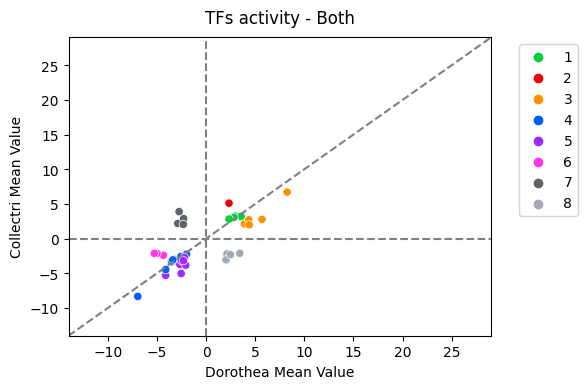

In [ ]:
plot_tf_scatterplot(df_both, "Both", show_text=False)

Paired group 2 and 7 is significant with p-value: 0.0413
Paired group 3 and 7 is significant with p-value: 0.0082


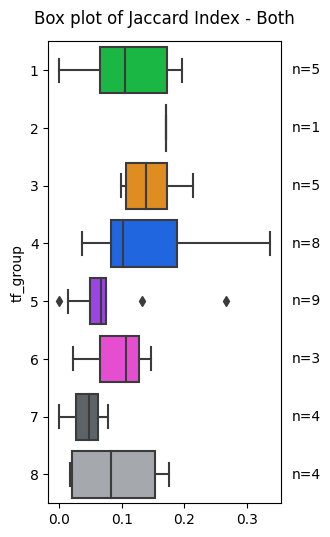

In [ ]:
plot_jaccard_boxplot(df_both, "Both")

Group 1 - Wilcoxon Test P-value: 1.0000
Group 2 - Wilcoxon Test P-value: 1.0000
Group 3 - Wilcoxon Test P-value: 0.6250
Group 4 - Wilcoxon Test P-value: 0.1484
Group 5 - Wilcoxon Test P-value: 0.9102
Group 6 - Wilcoxon Test P-value: 0.7500
Group 7 - Wilcoxon Test P-value: 0.1250
Group 8 - Wilcoxon Test P-value: 0.1250


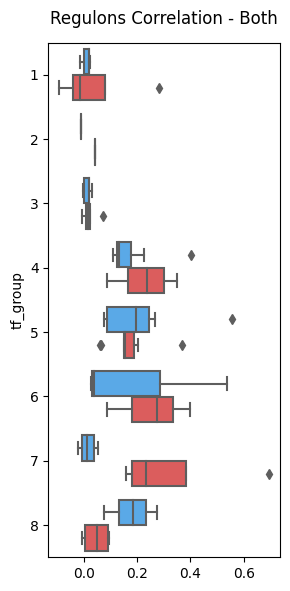

In [ ]:
plot_horizontal_boxplot(df_both, "Both")

Group 1 - Wilcoxon Test P-value: 0.0625
Group 2 - Wilcoxon Test P-value: 1.0000
Group 3 - Wilcoxon Test P-value: 0.0625
Group 4 - Wilcoxon Test P-value: 0.0156
Group 5 - Wilcoxon Test P-value: 0.0117
Group 6 - Wilcoxon Test P-value: 0.2500
Group 7 - Wilcoxon Test P-value: 0.1250
Group 8 - Wilcoxon Test P-value: 0.1250


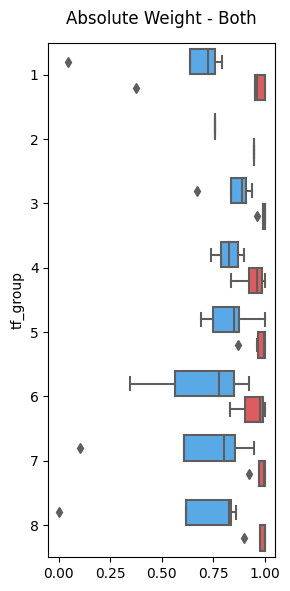

In [ ]:
plot_horizontal_boxplot(df_both, "Both", prefix="weight")

Group 1 - Wilcoxon Test P-value: 1.0000
Group 2 - Wilcoxon Test P-value: 1.0000
Group 3 - Wilcoxon Test P-value: 0.4375
Group 4 - Wilcoxon Test P-value: 0.1484
Group 5 - Wilcoxon Test P-value: 0.2031
Group 6 - Wilcoxon Test P-value: 1.0000
Group 7 - Wilcoxon Test P-value: 0.3750
Group 8 - Wilcoxon Test P-value: 0.6250


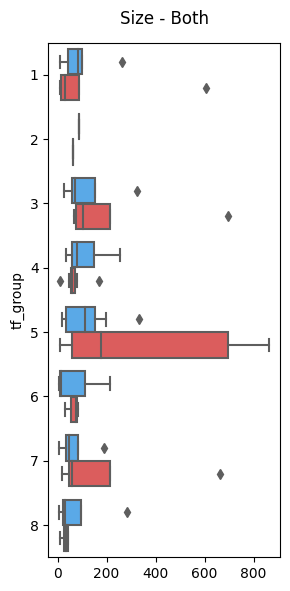

In [ ]:
plot_horizontal_boxplot(df_both, "Both", prefix="sizes")

#### 2. CollecTRI alone

In [ ]:
df_collectri = calculate_correlation_regulons(list(acts_collectri), "collectri")
df_collectri.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
8,ETS2,-2.467723,0.083570,0.172205,0.177570,0.929825,1.000000,66,19,0.239316,0.964286,0.578947,0.612903,v,8,1
4,E2F3,2.169298,-0.328232,0.011571,-0.000467,0.941176,1.000000,60,12,0.205882,1.000000,0.882353,0.857143,^,7,1
26,POU2F1,-2.094330,-1.199714,0.124047,0.109802,0.693548,0.910448,56,37,0.193750,0.903226,0.451613,0.552239,s,5,1
33,TP53,-3.570827,-1.804680,0.102666,0.104310,0.646341,0.812395,757,489,0.188722,0.936255,0.769309,0.819095,s,5,1
29,SOX10,-3.419030,-1.482591,0.262980,0.100623,0.789474,0.911111,23,32,0.185714,1.000000,0.605263,0.711111,s,5,1


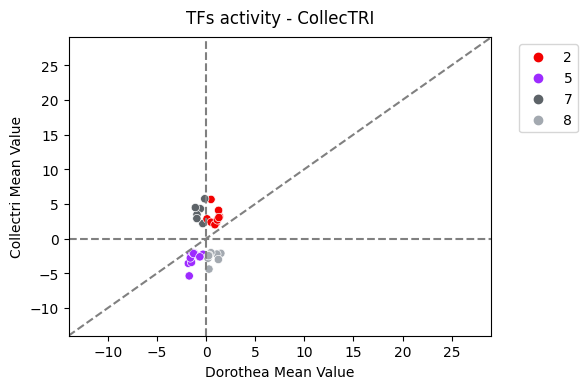

In [ ]:
plot_tf_scatterplot(df_collectri, "CollecTRI", show_text=False)

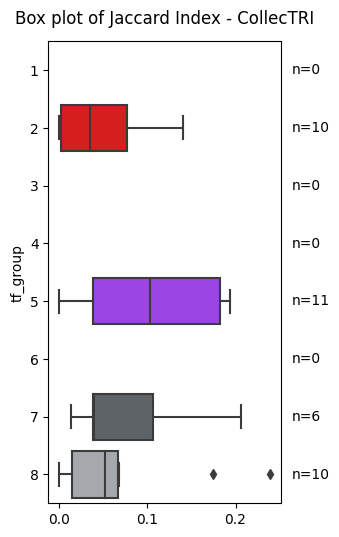

In [ ]:
plot_jaccard_boxplot(df_collectri, "CollecTRI")

Group 2 - Wilcoxon Test P-value: 0.0645
Group 5 - Wilcoxon Test P-value: 0.2061
Group 7 - Wilcoxon Test P-value: 0.0625
Group 8 - Wilcoxon Test P-value: 0.6953


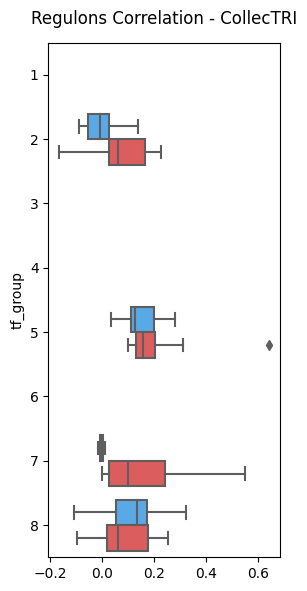

In [ ]:
plot_horizontal_boxplot(df_collectri, "CollecTRI")

Group 2 - Wilcoxon Test P-value: 0.0630
Group 5 - Wilcoxon Test P-value: 0.0010
Group 7 - Wilcoxon Test P-value: 0.0312
Group 8 - Wilcoxon Test P-value: 0.0020


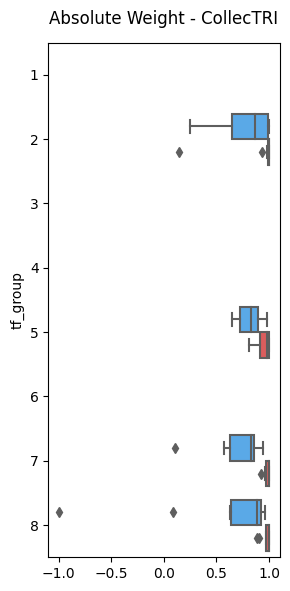

In [ ]:
plot_horizontal_boxplot(df_collectri, "CollecTRI", prefix="weight")

Group 2 - Wilcoxon Test P-value: 0.9219
Group 5 - Wilcoxon Test P-value: 0.4131
Group 7 - Wilcoxon Test P-value: 1.0000
Group 8 - Wilcoxon Test P-value: 1.0000


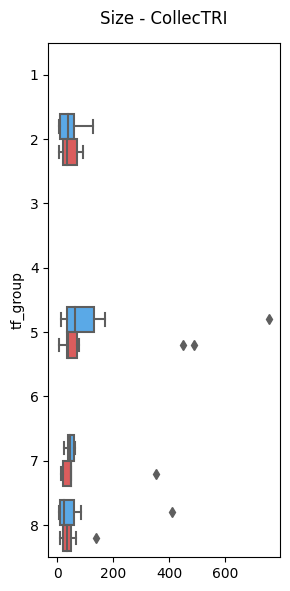

In [ ]:
plot_horizontal_boxplot(df_collectri, "CollecTRI", prefix="sizes")

#### 3. DoRothEA alone

In [ ]:
df_dorothea = calculate_correlation_regulons(list(acts_dorothea), "dorothea")
df_dorothea.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
39,YY1,0.514536,2.101527,0.045595,0.007972,0.360902,0.436893,166,90,0.186495,0.948276,0.624060,0.873786,o,3,2
21,NFIC,-0.740842,-2.145019,0.050720,0.117108,0.829268,0.945455,46,90,0.185185,1.000000,0.560976,0.818182,s,6,2
28,REST,0.565136,-2.008469,0.087487,0.144182,-0.902439,0.797101,32,35,0.143939,0.421053,0.390244,0.507246,^,7,2
12,FOXL2,0.341300,2.572033,-0.006816,-0.077387,0.307692,0.909091,13,9,0.142857,0.500000,0.500000,0.409091,o,3,2
26,RARA,-0.365109,-2.941688,0.030395,0.180144,0.808511,0.952381,106,101,0.141818,0.948718,0.563830,0.801587,s,6,2


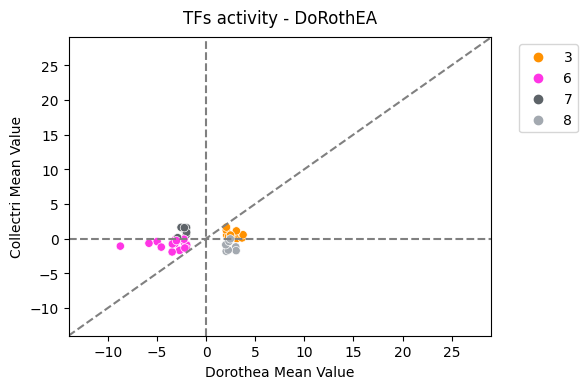

In [ ]:
plot_tf_scatterplot(df_dorothea, "DoRothEA", show_text=False)

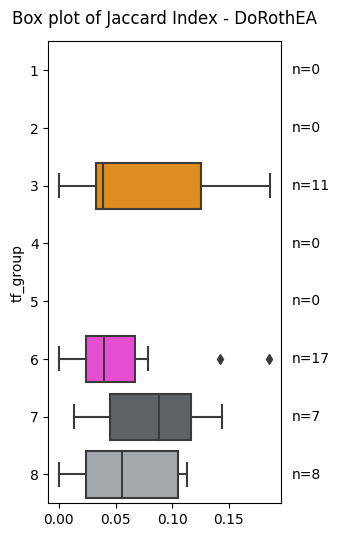

In [ ]:
plot_jaccard_boxplot(df_dorothea, "DoRothEA")

Group 3 - Wilcoxon Test P-value: 0.5195
Group 6 - Wilcoxon Test P-value: 0.0000
Group 7 - Wilcoxon Test P-value: 0.0156
Group 8 - Wilcoxon Test P-value: 0.1094


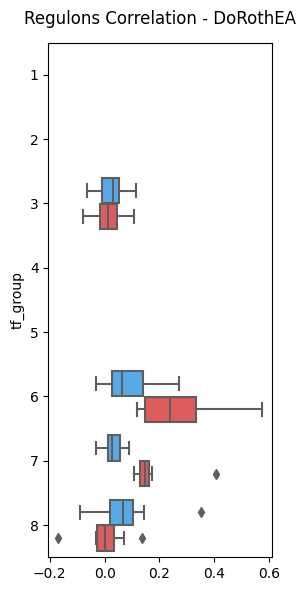

In [ ]:
plot_horizontal_boxplot(df_dorothea, "DoRothEA")

Group 3 - Wilcoxon Test P-value: 0.0010
Group 6 - Wilcoxon Test P-value: 0.0005
Group 7 - Wilcoxon Test P-value: 0.0156
Group 8 - Wilcoxon Test P-value: 0.0078


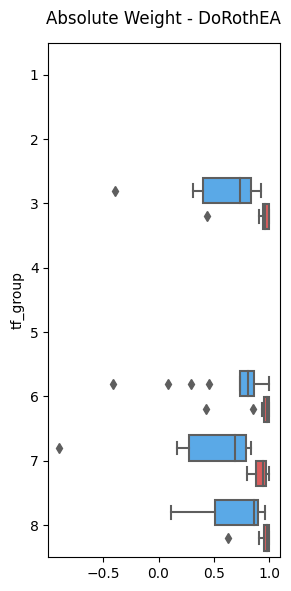

In [ ]:
plot_horizontal_boxplot(df_dorothea, "DoRothEA", prefix="weight")

Group 3 - Wilcoxon Test P-value: 1.0000
Group 6 - Wilcoxon Test P-value: 0.0129
Group 7 - Wilcoxon Test P-value: 0.0781
Group 8 - Wilcoxon Test P-value: 0.7422


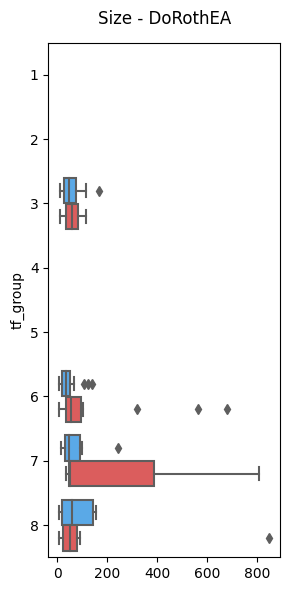

In [ ]:
plot_horizontal_boxplot(df_dorothea, "DoRothEA", prefix="sizes")

#### 4. Non-significant

In [ ]:
df_none = calculate_correlation_regulons(list(acts_none), "none")
df_none.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
65,MYC,1.902919,-1.009620,0.074771,0.134906,0.810811,0.909677,701,402,0.402073,0.984536,0.789414,0.864516,^,7,4
103,STAT4,0.659051,1.932739,0.203497,0.060989,0.875000,0.846154,12,9,0.285714,1.000000,0.375000,0.692308,o,3,4
97,SP1,-0.244193,1.533525,0.090725,0.052092,0.929641,0.923858,862,278,0.245500,0.979472,0.645210,0.705584,v,8,4
30,FOXO4,-1.661498,-1.232357,0.436830,0.333672,0.741935,1.000000,20,11,0.243243,1.000000,0.645161,0.733333,s,5,4
18,E2F2,0.928814,1.545948,0.010644,0.036212,0.760000,1.000000,44,21,0.241379,1.000000,0.880000,0.954545,o,3,4


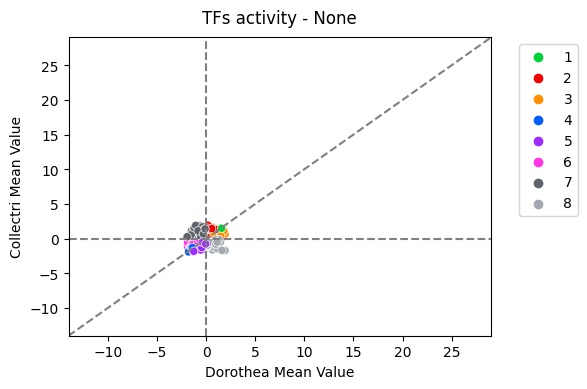

In [ ]:
plot_tf_scatterplot(df_none, "None", show_text=False)

Paired group 3 and 7 is significant with p-value: 0.0478
Paired group 3 and 8 is significant with p-value: 0.0414


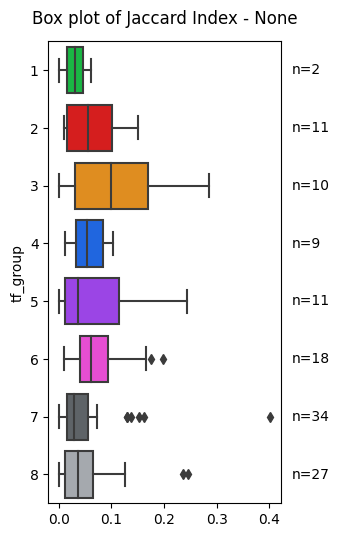

In [ ]:
plot_jaccard_boxplot(df_none, "None")

Group 1 - Wilcoxon Test P-value: 0.5000
Group 2 - Wilcoxon Test P-value: 0.1230
Group 3 - Wilcoxon Test P-value: 0.0488
Group 4 - Wilcoxon Test P-value: 0.3008
Group 5 - Wilcoxon Test P-value: 0.1748
Group 6 - Wilcoxon Test P-value: 0.0898
Group 7 - Wilcoxon Test P-value: 0.0000
Group 8 - Wilcoxon Test P-value: 0.0954


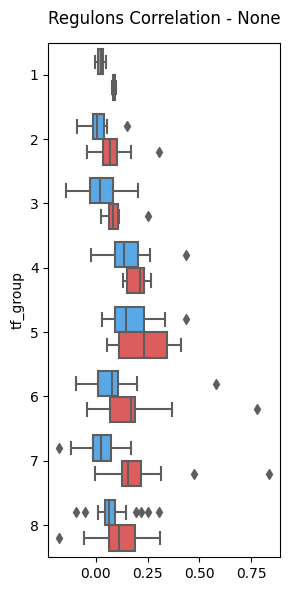

In [ ]:
plot_horizontal_boxplot(df_none, "None")

Group 1 - Wilcoxon Test P-value: 0.5000
Group 2 - Wilcoxon Test P-value: 0.0077
Group 3 - Wilcoxon Test P-value: 0.0039
Group 4 - Wilcoxon Test P-value: 0.0039
Group 5 - Wilcoxon Test P-value: 0.0077
Group 6 - Wilcoxon Test P-value: 0.0061
Group 7 - Wilcoxon Test P-value: 0.0000
Group 8 - Wilcoxon Test P-value: 0.0000


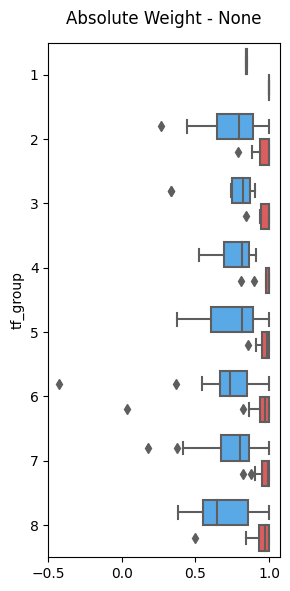

In [ ]:
plot_horizontal_boxplot(df_none, "None", prefix="weight")

Group 1 - Wilcoxon Test P-value: 1.0000
Group 2 - Wilcoxon Test P-value: 0.5195
Group 3 - Wilcoxon Test P-value: 0.3750
Group 4 - Wilcoxon Test P-value: 0.2500
Group 5 - Wilcoxon Test P-value: 0.1230
Group 6 - Wilcoxon Test P-value: 0.8312
Group 7 - Wilcoxon Test P-value: 0.7545
Group 8 - Wilcoxon Test P-value: 0.5619


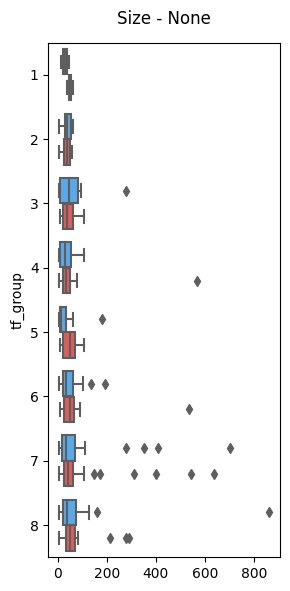

In [ ]:
plot_horizontal_boxplot(df_none, "None", prefix="sizes")

#### 5. Full Overlap List

In [ ]:
df_all = calculate_correlation_regulons(list(overlap_tfs), "all")
df_all.head()

,TF,tf_collectri,tf_dorothea,regulons_collectri,regulons_dorothea,weight_collectri,weight_dorothea,sizes_collectri,sizes_dorothea,Jaccard Index,Jaccard Weight,Jaccard Collectri,Jaccard Dorothea,marker,tf_group,significant_group
126,MYC,1.902919,-1.009620,0.074771,0.134906,0.810811,0.909677,701,402,0.402073,0.984536,0.789414,0.864516,^,7,4
139,NFKB1,-3.329904,-3.544864,0.110531,0.173820,0.833718,0.912000,246,171,0.336595,0.988372,0.568129,0.684000,s,4,3
203,STAT4,0.659051,1.932739,0.203497,0.060989,0.875000,0.846154,12,9,0.285714,1.000000,0.375000,0.692308,o,3,4
171,RELA,-3.232689,-2.474921,0.087019,0.065716,0.779359,0.868313,333,179,0.265723,0.952663,0.592527,0.736626,s,5,3
191,SP1,-0.244193,1.533525,0.090725,0.052092,0.929641,0.923858,862,278,0.245500,0.979472,0.645210,0.705584,v,8,4


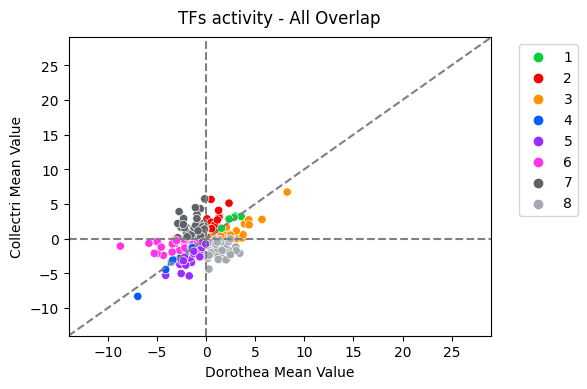

In [ ]:
plot_tf_scatterplot(df_all, "All Overlap", show_text=False)

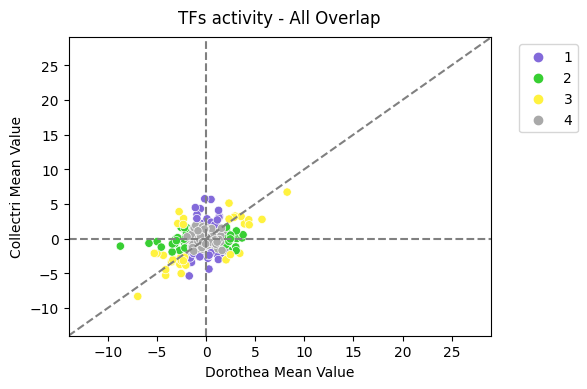

In [ ]:
plot_tf_scatterplot(df_all, "All Overlap", show_text=False, color_by="significant_group")

Paired group 3 and 6 is significant with p-value: 0.0380
Paired group 3 and 7 is significant with p-value: 0.0166
Paired group 3 and 8 is significant with p-value: 0.0175


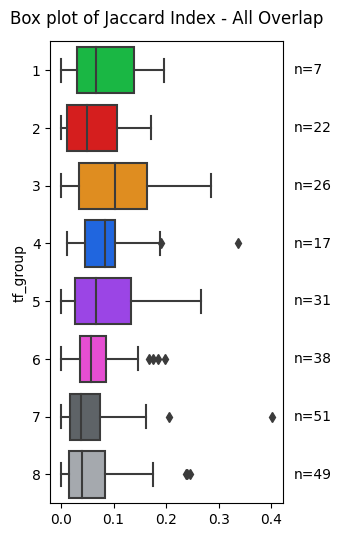

In [ ]:
plot_jaccard_boxplot(df_all, "All Overlap")

Group 1 - Wilcoxon Test P-value: 0.4688
Group 2 - Wilcoxon Test P-value: 0.0103
Group 3 - Wilcoxon Test P-value: 0.3941
Group 4 - Wilcoxon Test P-value: 0.0797
Group 5 - Wilcoxon Test P-value: 0.1954
Group 6 - Wilcoxon Test P-value: 0.0001
Group 7 - Wilcoxon Test P-value: 0.0000
Group 8 - Wilcoxon Test P-value: 0.7825


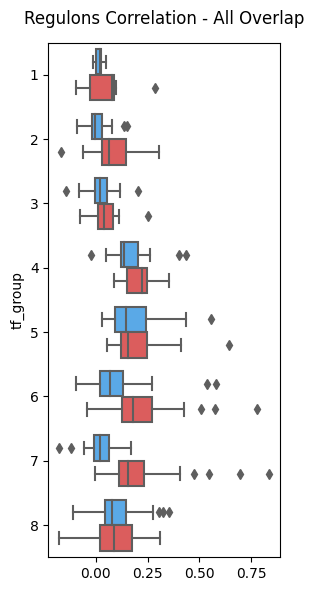

In [ ]:
plot_horizontal_boxplot(df_all, "All Overlap")

Group 1 - Wilcoxon Test P-value: 0.0156
Group 2 - Wilcoxon Test P-value: 0.0007
Group 3 - Wilcoxon Test P-value: 0.0000
Group 4 - Wilcoxon Test P-value: 0.0000
Group 5 - Wilcoxon Test P-value: 0.0000
Group 6 - Wilcoxon Test P-value: 0.0000
Group 7 - Wilcoxon Test P-value: 0.0000
Group 8 - Wilcoxon Test P-value: 0.0000


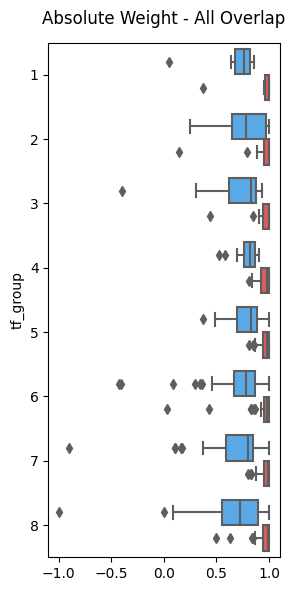

In [ ]:
plot_horizontal_boxplot(df_all, "All Overlap", prefix="weight")

Group 1 - Wilcoxon Test P-value: 0.9375
Group 2 - Wilcoxon Test P-value: 0.7024
Group 3 - Wilcoxon Test P-value: 1.0000
Group 4 - Wilcoxon Test P-value: 0.7119
Group 5 - Wilcoxon Test P-value: 0.2990
Group 6 - Wilcoxon Test P-value: 0.0614
Group 7 - Wilcoxon Test P-value: 0.1908
Group 8 - Wilcoxon Test P-value: 0.6837


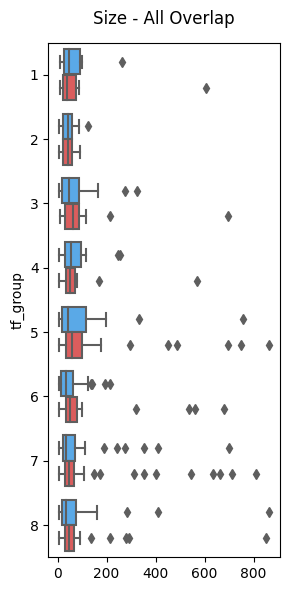

In [ ]:
plot_horizontal_boxplot(df_all, "All Overlap", prefix="sizes")